In [1]:
import torch
from dataloaders.beat import CustomDataset
from dataloaders.build_vocab import Vocab
import pickle
import numpy as np

config_file = open("camn_config.obj", 'rb') 
args = pickle.load(config_file)
args.batch_size = 128

mean_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_mean.npy"))
std_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_std.npy"))
mean_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_mean.npy"))
std_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_std.npy"))

In [2]:
train_data = CustomDataset(args, "train")
train_loader = torch.utils.data.DataLoader(
    train_data, 
    batch_size=args.batch_size,  
    shuffle=True,  
    drop_last=True,
)

In [3]:
len(train_loader)

1857

In [4]:
val_data = CustomDataset(args, "val")
val_loader = torch.utils.data.DataLoader(
    val_data, 
    batch_size=args.batch_size,  
    shuffle=True,  
    drop_last=True,
)

In [5]:
len(val_loader)

371

### Test A2BS SimpleNet

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scripts.Dataset import a2bsDataset
from scripts.SimpleNet import FaceGenerator
#import wandb
import uuid

In [ ]:
# project = "testing"
# group = "facegenerator"
# name = "test"
# dataset_name = "beat"
# entity = "hm_gesture"
# run = wandb.init(
#         project="testing",
#         group="facegenerator",
#         name= f"{name}-{dataset_name}-{str(uuid.uuid4())[:8]}",
#         id=str(uuid.uuid4()),
#         entity=entity,
#     )
# wandb.run.save()

In [16]:
net = FaceGenerator().cuda()
optimizer = torch.optim.Adam( net.parameters(), lr=1e-4)#, weight_decay=1e-5)
train_target_loss = []
train_expressive_loss = []
train_smooth_loss = []
train_mse_loss = []
val_target_loss = []
val_expressive_loss = []
val_smooth_loss = []
val_mse_loss = []

def plot_train_val_loss():
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].plot(train_target_loss, 'r-')
    axs[0].set_title('Target Loss')
    axs[1].plot(train_expressive_loss, 'p-')
    axs[1].set_title('Expressive Loss')
    axs[2].plot(train_smooth_loss, 'g-')
    axs[2].set_title('Smooth Loss')
    axs[3].plot(train_mse_loss, 'b-')
    axs[3].set_title('MSE Loss')
    fig.suptitle('Training Iterations', fontsize = 16)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].plot(val_target_loss, 'r-')
    axs[0].set_title('Target Loss')
    axs[1].plot(val_expressive_loss, 'p-')
    axs[1].set_title('Expressive Loss')
    axs[2].plot(val_smooth_loss, 'g-')
    axs[2].set_title('Smooth Loss')
    axs[3].plot(val_mse_loss, 'b-')
    axs[3].set_title('MSE Loss')
    fig.suptitle('Validation Iterations', fontsize = 16)
    plt.tight_layout()
    plt.show()

In [17]:
print(len(train_data))
data = next(iter(train_loader))
in_audio = data['audio']
facial = data['facial']

237714


In [2]:
def expressive_loss_function(output, target): # max squared error over blendshape for each frame, then take the mean
    loss = torch.mean(torch.max((output - target) ** 2, dim=-1).values)
    return loss
# a = torch.tensor([[[1,2,3],[1,2,3]],[[4,5,6],[4,5,6]]]).float()
# b = torch.tensor([[[3,3,4],[2,3,4]],[[5,6,7],[5,6,7]]]).float()
# print(a.shape)
# max_square_error(a, b)

  0%|          | 0/1857 [00:00<?, ?it/s]

[0][0/1857]: [train] [target loss]: 0.36348757147789 [exp loss]: 8.916378021240234 [smooth loss]: 0.043505191802978516 [mse]: 0.014086041751956095


  0%|          | 2/1857 [00:25<5:21:26, 10.40s/it] 

[0][0/1857]: [val] [target loss]: 0.34263362884521487 [exp loss]: 9.086397514343261 [smooth loss]: 0.0011664104461669921 [mse]: 0.01203692784813663


 11%|█         | 202/1857 [00:49<03:22,  8.16it/s]

[0][200/1857]: [train] [target loss]: 0.4132799506187439 [exp loss]: 5.995999336242676 [smooth loss]: 0.0021266937255859375 [mse]: 0.011856768584201847


 22%|██▏       | 402/1857 [01:13<02:57,  8.20it/s]

[0][400/1857]: [train] [target loss]: 0.2701163589954376 [exp loss]: 4.195566654205322 [smooth loss]: 0.003486812114715576 [mse]: 0.007553171784087891


 32%|███▏      | 600/1857 [01:37<02:33,  8.17it/s]

[0][600/1857]: [train] [target loss]: 0.2455025315284729 [exp loss]: 5.114891529083252 [smooth loss]: 0.00559312105178833 [mse]: 0.007451464548362329


 32%|███▏      | 602/1857 [02:03<1:51:55,  5.35s/it]

[0][600/1857]: [val] [target loss]: 0.25354799509048465 [exp loss]: 5.091513977050782 [smooth loss]: 0.003701639175415039 [mse]: 0.007282204127367912


 43%|████▎     | 802/1857 [02:27<02:10,  8.09it/s]  

[0][800/1857]: [train] [target loss]: 0.23726491630077362 [exp loss]: 4.644498348236084 [smooth loss]: 0.007109522819519043 [mse]: 0.007703045669239623


 54%|█████▍    | 1002/1857 [02:52<01:46,  8.04it/s]

[0][1000/1857]: [train] [target loss]: 0.2475510835647583 [exp loss]: 6.0955705642700195 [smooth loss]: 0.009801685810089111 [mse]: 0.007409450309813673


 65%|██████▍   | 1200/1857 [03:18<01:36,  6.80it/s]

[0][1200/1857]: [train] [target loss]: 0.22710832953453064 [exp loss]: 4.279720783233643 [smooth loss]: 0.009856700897216797 [mse]: 0.006915656722327366


 65%|██████▍   | 1201/1857 [03:43<1:22:42,  7.56s/it]

[0][1200/1857]: [val] [target loss]: 0.2205152678489685 [exp loss]: 4.595674953460693 [smooth loss]: 0.008111672401428223 [mse]: 0.006516994023136036


 75%|███████▌  | 1401/1857 [04:31<02:10,  3.48it/s]  

[0][1400/1857]: [train] [target loss]: 0.23299957811832428 [exp loss]: 4.948820114135742 [smooth loss]: 0.011615395545959473 [mse]: 0.0070161586336172825


 86%|████████▌ | 1601/1857 [05:44<02:04,  2.06it/s]

[0][1600/1857]: [train] [target loss]: 0.21620775759220123 [exp loss]: 4.4085164070129395 [smooth loss]: 0.013712048530578613 [mse]: 0.006525503771111881


 97%|█████████▋| 1800/1857 [08:09<01:15,  1.32s/it]

[0][1800/1857]: [train] [target loss]: 0.20090045034885406 [exp loss]: 4.372280120849609 [smooth loss]: 0.013177096843719482 [mse]: 0.006400783138655155


 97%|█████████▋| 1801/1857 [08:34<07:58,  8.55s/it]

[0][1800/1857]: [val] [target loss]: 0.20153784036636352 [exp loss]: 4.548536787033081 [smooth loss]: 0.010957341194152832 [mse]: 0.006069673223055128


100%|██████████| 1857/1857 [10:00<00:00,  3.09it/s]


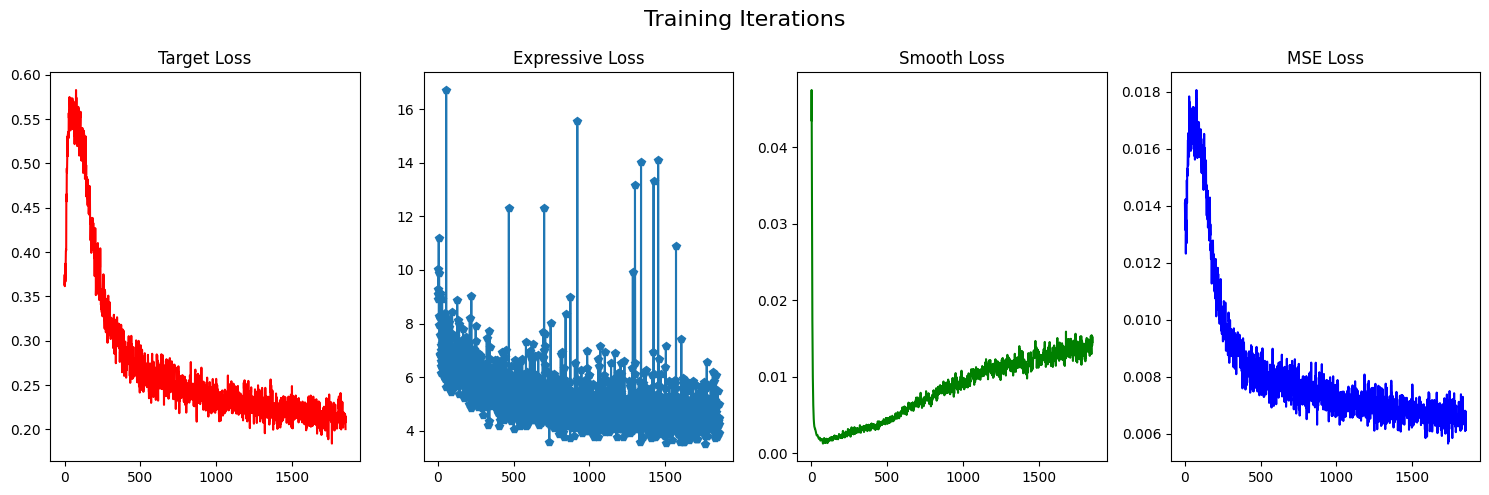

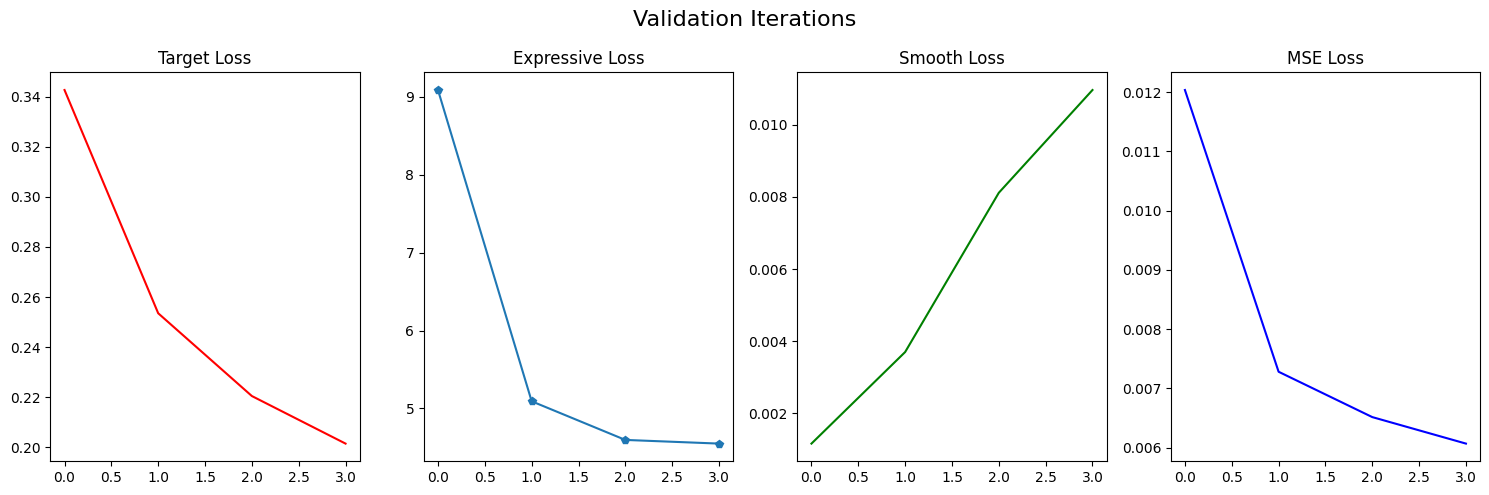

  0%|          | 0/1857 [00:00<?, ?it/s]

[1][0/1857]: [train] [target loss]: 0.2168535590171814 [exp loss]: 4.741946220397949 [smooth loss]: 0.012903571128845215 [mse]: 0.006889795472348875


  0%|          | 1/1857 [00:22<11:51:01, 22.99s/it]

[1][0/1857]: [val] [target loss]: 0.2016032552719116 [exp loss]: 4.454003181457519 [smooth loss]: 0.011005039215087891 [mse]: 0.006071601835182442


 11%|█         | 202/1857 [00:46<03:14,  8.49it/s] 

[1][200/1857]: [train] [target loss]: 0.21892781555652618 [exp loss]: 5.253673076629639 [smooth loss]: 0.012400031089782715 [mse]: 0.006485043112355917


 22%|██▏       | 402/1857 [01:10<02:50,  8.52it/s]

[1][400/1857]: [train] [target loss]: 0.2314273864030838 [exp loss]: 5.5880961418151855 [smooth loss]: 0.014652132987976074 [mse]: 0.006981773816237827


 32%|███▏      | 600/1857 [01:33<02:27,  8.51it/s]

[1][600/1857]: [train] [target loss]: 0.2217644453048706 [exp loss]: 4.5535197257995605 [smooth loss]: 0.015869140625 [mse]: 0.006826494966517029


 32%|███▏      | 601/1857 [01:56<2:24:25,  6.90s/it]

[1][600/1857]: [val] [target loss]: 0.22096679151058196 [exp loss]: 4.441910572052002 [smooth loss]: 0.013011512756347656 [mse]: 0.006155078679304713


 43%|████▎     | 802/1857 [02:20<02:03,  8.53it/s]  

[1][800/1857]: [train] [target loss]: 0.21033625304698944 [exp loss]: 4.495339870452881 [smooth loss]: 0.01797044277191162 [mse]: 0.00648325875805081


 54%|█████▍    | 1002/1857 [02:43<01:40,  8.47it/s]

[1][1000/1857]: [train] [target loss]: 0.19990231096744537 [exp loss]: 3.6067230701446533 [smooth loss]: 0.01690232753753662 [mse]: 0.0058307807688967195


 65%|██████▍   | 1200/1857 [03:07<01:17,  8.53it/s]

[1][1200/1857]: [train] [target loss]: 0.21200859546661377 [exp loss]: 4.146245956420898 [smooth loss]: 0.016294479370117188 [mse]: 0.006733951848682512


 65%|██████▍   | 1202/1857 [03:29<50:46,  4.65s/it]  

[1][1200/1857]: [val] [target loss]: 0.197702779173851 [exp loss]: 4.202908878326416 [smooth loss]: 0.013330059051513672 [mse]: 0.0057690934872301055


 75%|███████▌  | 1402/1857 [03:52<00:53,  8.53it/s]

[1][1400/1857]: [train] [target loss]: 0.18748901784420013 [exp loss]: 3.9111642837524414 [smooth loss]: 0.018416881561279297 [mse]: 0.005880503317532546


 86%|████████▋ | 1602/1857 [04:16<00:29,  8.55it/s]

[1][1600/1857]: [train] [target loss]: 0.2019565999507904 [exp loss]: 4.375498294830322 [smooth loss]: 0.01762181520462036 [mse]: 0.006495915341158926


 97%|█████████▋| 1800/1857 [04:39<00:06,  8.47it/s]

[1][1800/1857]: [train] [target loss]: 0.21294157207012177 [exp loss]: 4.6868672370910645 [smooth loss]: 0.017499864101409912 [mse]: 0.006481592463598744


 97%|█████████▋| 1802/1857 [05:00<04:00,  4.37s/it]

[1][1800/1857]: [val] [target loss]: 0.18869980037212372 [exp loss]: 4.279560804367065 [smooth loss]: 0.01380089282989502 [mse]: 0.0055421921818023445


100%|██████████| 1857/1857 [05:07<00:00,  6.05it/s]


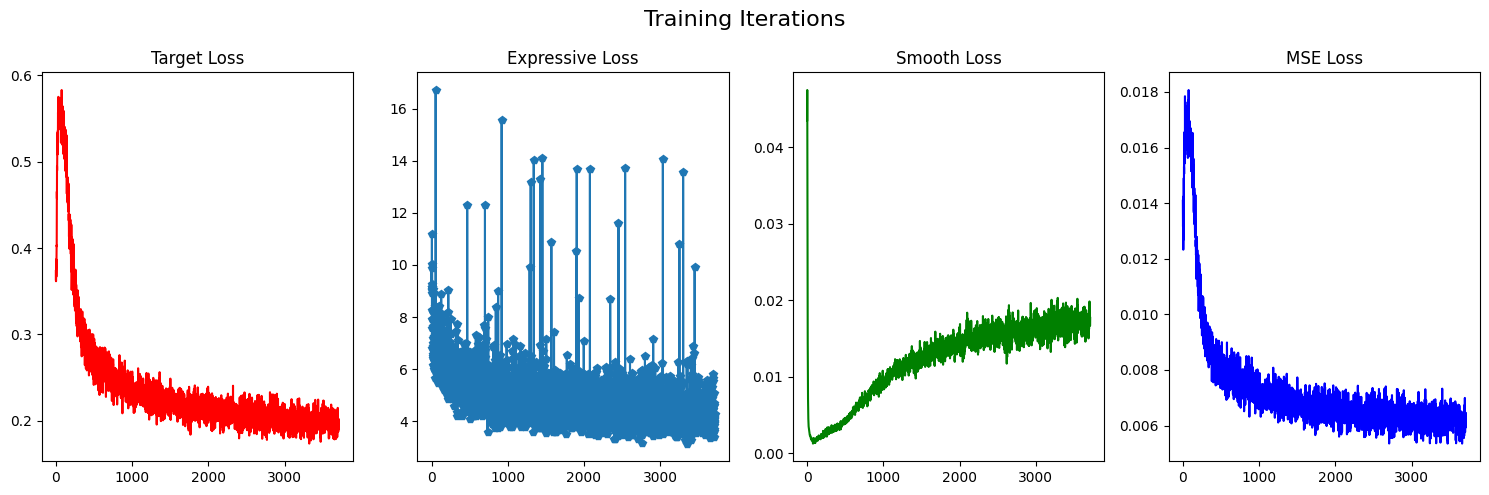

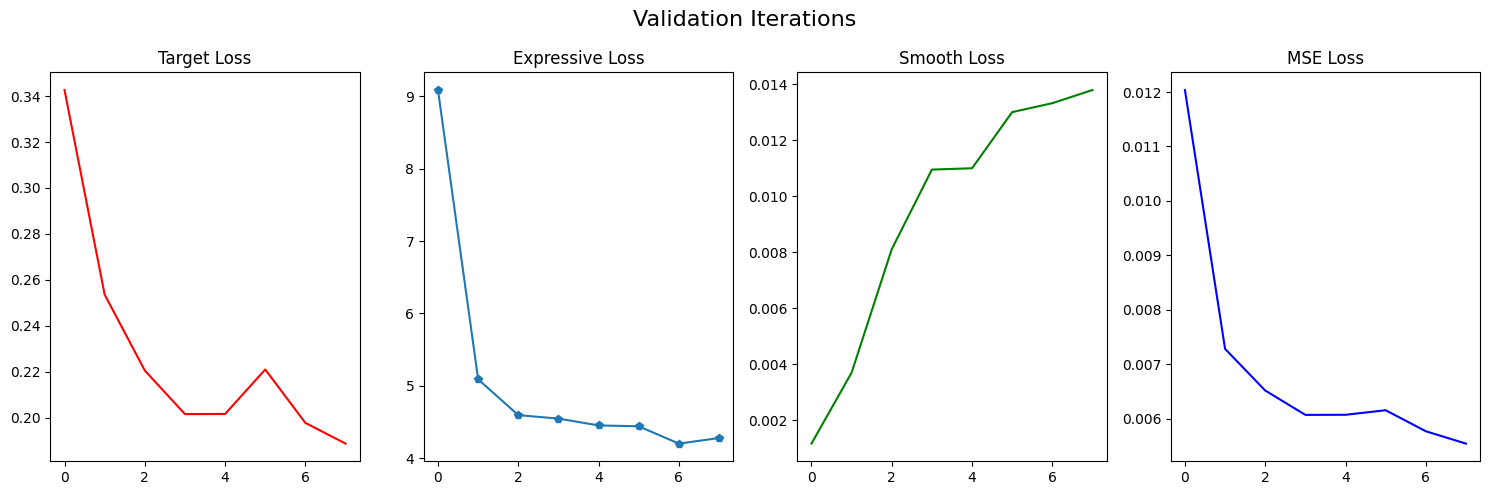

  0%|          | 0/1857 [00:00<?, ?it/s]

[2][0/1857]: [train] [target loss]: 0.1972193717956543 [exp loss]: 4.060464859008789 [smooth loss]: 0.015173196792602539 [mse]: 0.006323638273015931


  0%|          | 1/1857 [00:19<9:51:02, 19.11s/it]

[2][0/1857]: [val] [target loss]: 0.18387508630752564 [exp loss]: 4.231872072219849 [smooth loss]: 0.014243133068084717 [mse]: 0.005465874967544253


 11%|█         | 202/1857 [00:42<03:13,  8.55it/s]

[2][200/1857]: [train] [target loss]: 0.19122418761253357 [exp loss]: 3.78625226020813 [smooth loss]: 0.017382025718688965 [mse]: 0.0059022838940276795


 22%|██▏       | 402/1857 [01:06<02:50,  8.55it/s]

[2][400/1857]: [train] [target loss]: 0.19160164892673492 [exp loss]: 4.066588878631592 [smooth loss]: 0.016076266765594482 [mse]: 0.006109379764496263


 32%|███▏      | 600/1857 [01:29<02:28,  8.47it/s]

[2][600/1857]: [train] [target loss]: 0.2135232537984848 [exp loss]: 6.377016544342041 [smooth loss]: 0.01770871877670288 [mse]: 0.0065992019521136985


 32%|███▏      | 602/1857 [01:48<1:24:06,  4.02s/it]

[2][600/1857]: [val] [target loss]: 0.18549621284008025 [exp loss]: 4.001692581176758 [smooth loss]: 0.015532946586608887 [mse]: 0.005594260937079127


 43%|████▎     | 802/1857 [02:12<02:03,  8.51it/s]  

[2][800/1857]: [train] [target loss]: 0.196891188621521 [exp loss]: 4.457752704620361 [smooth loss]: 0.019146502017974854 [mse]: 0.006180555569706218


 54%|█████▍    | 1002/1857 [02:35<01:41,  8.46it/s]

[2][1000/1857]: [train] [target loss]: 0.20132984220981598 [exp loss]: 6.182615280151367 [smooth loss]: 0.016883134841918945 [mse]: 0.00616346739258888


 65%|██████▍   | 1200/1857 [02:58<01:17,  8.49it/s]

[2][1200/1857]: [train] [target loss]: 0.18524464964866638 [exp loss]: 4.3918538093566895 [smooth loss]: 0.01852506399154663 [mse]: 0.005727188098548032


 65%|██████▍   | 1202/1857 [03:16<40:55,  3.75s/it]

[2][1200/1857]: [val] [target loss]: 0.17768613815307618 [exp loss]: 4.063691520690918 [smooth loss]: 0.01637321949005127 [mse]: 0.005272358281703149


 75%|███████▌  | 1402/1857 [03:39<00:53,  8.50it/s]

[2][1400/1857]: [train] [target loss]: 0.19034749269485474 [exp loss]: 4.375753879547119 [smooth loss]: 0.018884122371673584 [mse]: 0.006001043408129302


 86%|████████▋ | 1602/1857 [04:03<00:30,  8.43it/s]

[2][1600/1857]: [train] [target loss]: 0.2006249874830246 [exp loss]: 4.277100563049316 [smooth loss]: 0.018700063228607178 [mse]: 0.006500923765000924


 97%|█████████▋| 1800/1857 [04:26<00:06,  8.43it/s]

[2][1800/1857]: [train] [target loss]: 0.19961923360824585 [exp loss]: 4.040394306182861 [smooth loss]: 0.019952476024627686 [mse]: 0.006213293912601643


 97%|█████████▋| 1802/1857 [04:42<03:04,  3.36s/it]

[2][1800/1857]: [val] [target loss]: 0.17592531561851502 [exp loss]: 4.440985269546509 [smooth loss]: 0.0162229323387146 [mse]: 0.005366229687044879


100%|██████████| 1857/1857 [04:49<00:00,  6.40it/s]


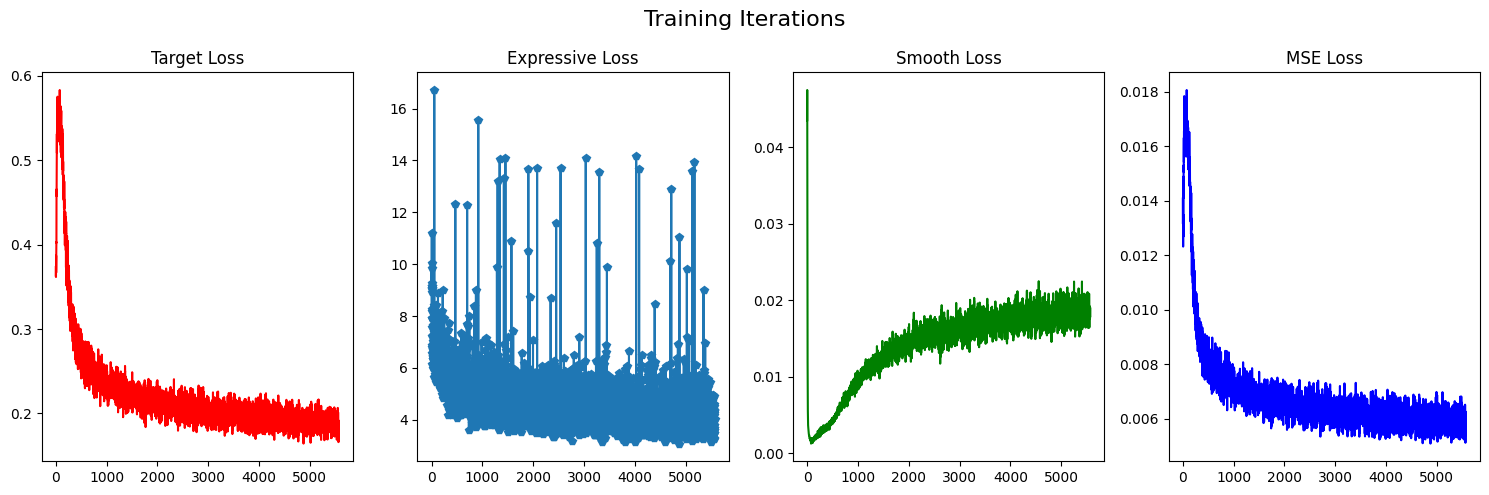

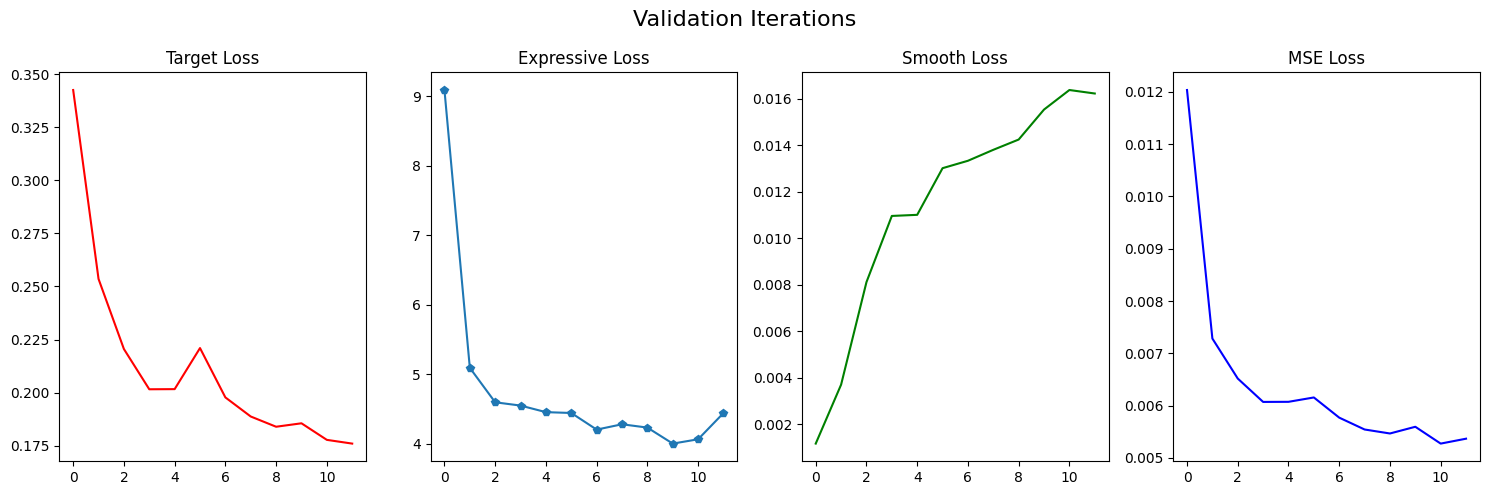

  0%|          | 0/1857 [00:00<?, ?it/s]

[3][0/1857]: [train] [target loss]: 0.1835145503282547 [exp loss]: 4.083861827850342 [smooth loss]: 0.01861131191253662 [mse]: 0.005617134028164006


  0%|          | 2/1857 [00:15<3:18:22,  6.42s/it]

[3][0/1857]: [val] [target loss]: 0.1737650752067566 [exp loss]: 4.3947048759460445 [smooth loss]: 0.01669156789779663 [mse]: 0.005336230781335641


 11%|█         | 202/1857 [00:42<03:39,  7.54it/s]

[3][200/1857]: [train] [target loss]: 0.1905321478843689 [exp loss]: 4.328166484832764 [smooth loss]: 0.018304049968719482 [mse]: 0.005896353127853852


 22%|██▏       | 402/1857 [01:08<03:06,  7.78it/s]

[3][400/1857]: [train] [target loss]: 0.1853327453136444 [exp loss]: 3.8223774433135986 [smooth loss]: 0.020240068435668945 [mse]: 0.006061499611163594


 32%|███▏      | 600/1857 [01:34<02:45,  7.61it/s]

[3][600/1857]: [train] [target loss]: 0.19442443549633026 [exp loss]: 4.238610744476318 [smooth loss]: 0.017726898193359375 [mse]: 0.006220777678761223


 32%|███▏      | 601/1857 [01:50<1:41:48,  4.86s/it]

[3][600/1857]: [val] [target loss]: 0.17601893544197084 [exp loss]: 4.028706378936768 [smooth loss]: 0.012750060558319091 [mse]: 0.005399702021311123


 43%|████▎     | 802/1857 [02:16<02:17,  7.70it/s]  

[3][800/1857]: [train] [target loss]: 0.17185604572296143 [exp loss]: 3.474989175796509 [smooth loss]: 0.01722574234008789 [mse]: 0.005446043077933472


 54%|█████▍    | 1002/1857 [02:43<01:51,  7.65it/s]

[3][1000/1857]: [train] [target loss]: 0.1967899054288864 [exp loss]: 4.2766337394714355 [smooth loss]: 0.01839768886566162 [mse]: 0.006217838477183894


 65%|██████▍   | 1200/1857 [03:09<01:26,  7.58it/s]

[3][1200/1857]: [train] [target loss]: 0.1744917631149292 [exp loss]: 3.746689796447754 [smooth loss]: 0.01892721652984619 [mse]: 0.00540708261994084


 65%|██████▍   | 1202/1857 [03:23<34:46,  3.19s/it]

[3][1200/1857]: [val] [target loss]: 0.1735925430059433 [exp loss]: 4.006244325637818 [smooth loss]: 0.016214265823364257 [mse]: 0.005349964130984958


 75%|███████▌  | 1402/1857 [03:50<01:00,  7.46it/s]

[3][1400/1857]: [train] [target loss]: 0.18565820157527924 [exp loss]: 4.530694484710693 [smooth loss]: 0.018633008003234863 [mse]: 0.005714423925321534


 86%|████████▋ | 1602/1857 [04:16<00:33,  7.71it/s]

[3][1600/1857]: [train] [target loss]: 0.195057213306427 [exp loss]: 5.2417378425598145 [smooth loss]: 0.019414126873016357 [mse]: 0.006337940367353487


 97%|█████████▋| 1800/1857 [04:43<00:07,  7.51it/s]

[3][1800/1857]: [train] [target loss]: 0.20081652700901031 [exp loss]: 5.654568195343018 [smooth loss]: 0.022301137447357178 [mse]: 0.006200970563483543


 97%|█████████▋| 1802/1857 [04:56<02:42,  2.96s/it]

[3][1800/1857]: [val] [target loss]: 0.18021830677986145 [exp loss]: 4.1172474765777585 [smooth loss]: 0.01973910093307495 [mse]: 0.005277438107465874


100%|██████████| 1857/1857 [05:04<00:00,  6.11it/s]


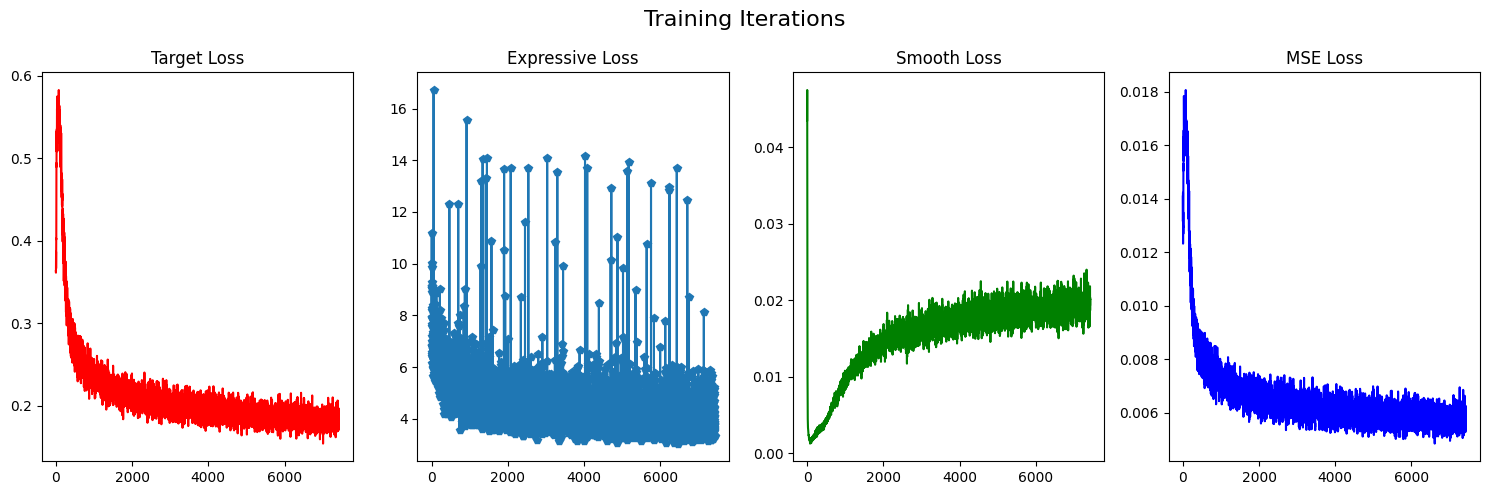

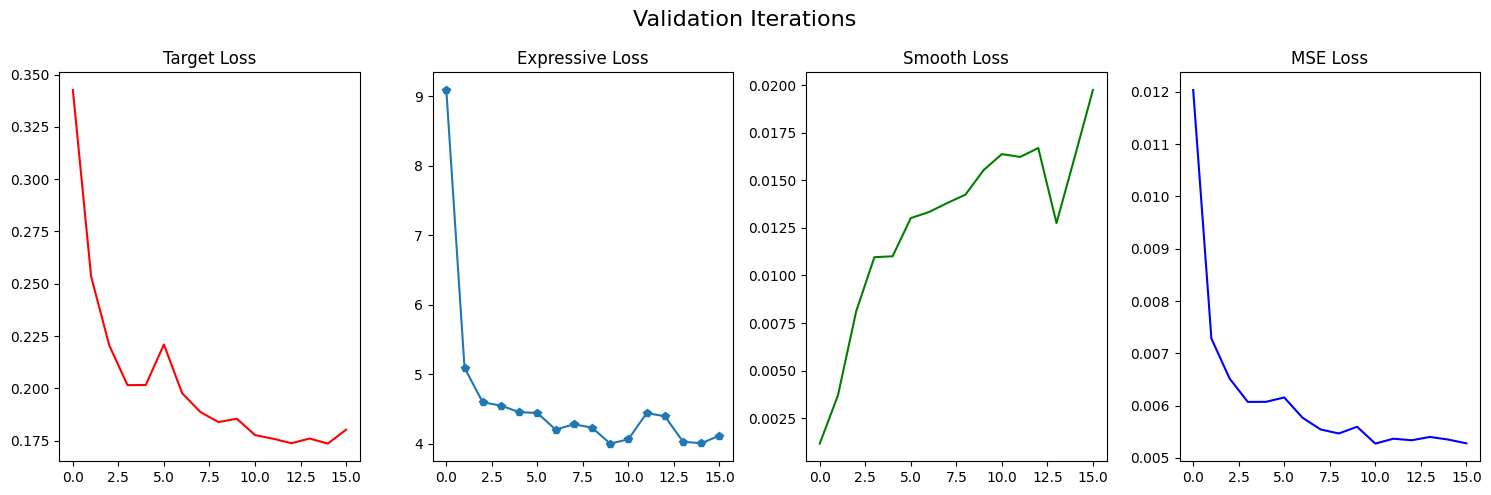

  0%|          | 0/1857 [00:00<?, ?it/s]

[4][0/1857]: [train] [target loss]: 0.17403624951839447 [exp loss]: 3.5783488750457764 [smooth loss]: 0.01785820722579956 [mse]: 0.005576111602872675


  0%|          | 1/1857 [00:13<6:49:12, 13.23s/it]

[4][0/1857]: [val] [target loss]: 0.16749386250972748 [exp loss]: 4.109991979598999 [smooth loss]: 0.015715148448944092 [mse]: 0.005139565914360516


 11%|█         | 202/1857 [00:39<03:43,  7.39it/s]

[4][200/1857]: [train] [target loss]: 0.16647927463054657 [exp loss]: 3.289754629135132 [smooth loss]: 0.02082890272140503 [mse]: 0.0051191538851732355


 22%|██▏       | 402/1857 [01:06<03:14,  7.47it/s]

[4][400/1857]: [train] [target loss]: 0.19969336688518524 [exp loss]: 4.073102951049805 [smooth loss]: 0.018780291080474854 [mse]: 0.006743988802691312


 32%|███▏      | 600/1857 [01:32<02:43,  7.70it/s]

[4][600/1857]: [train] [target loss]: 0.17284606397151947 [exp loss]: 3.6318507194519043 [smooth loss]: 0.020433247089385986 [mse]: 0.005217387231603392


 32%|███▏      | 602/1857 [01:45<55:42,  2.66s/it]  

[4][600/1857]: [val] [target loss]: 0.17390668511390686 [exp loss]: 3.907172689437866 [smooth loss]: 0.017379939556121826 [mse]: 0.005220582326982884


 43%|████▎     | 802/1857 [02:11<02:20,  7.51it/s]

[4][800/1857]: [train] [target loss]: 0.18977297842502594 [exp loss]: 4.46848726272583 [smooth loss]: 0.018404603004455566 [mse]: 0.006214688493501596


 54%|█████▍    | 1002/1857 [02:38<01:51,  7.66it/s]

[4][1000/1857]: [train] [target loss]: 0.19016645848751068 [exp loss]: 5.036859035491943 [smooth loss]: 0.01904088258743286 [mse]: 0.006047719952051124


 65%|██████▍   | 1200/1857 [03:04<01:27,  7.54it/s]

[4][1200/1857]: [train] [target loss]: 0.18601346015930176 [exp loss]: 4.583283424377441 [smooth loss]: 0.019484996795654297 [mse]: 0.0057882844720835115


 65%|██████▍   | 1202/1857 [03:16<28:18,  2.59s/it]

[4][1200/1857]: [val] [target loss]: 0.17486556470394135 [exp loss]: 4.179497117996216 [smooth loss]: 0.018506786823272704 [mse]: 0.005287475606992886


 75%|███████▌  | 1402/1857 [03:42<01:00,  7.48it/s]

[4][1400/1857]: [train] [target loss]: 0.17835845053195953 [exp loss]: 4.028036117553711 [smooth loss]: 0.019661128520965576 [mse]: 0.005510815351578633


 86%|████████▋ | 1602/1857 [04:09<00:33,  7.58it/s]

[4][1600/1857]: [train] [target loss]: 0.17943282425403595 [exp loss]: 4.234464645385742 [smooth loss]: 0.018897294998168945 [mse]: 0.005726300722201786


 97%|█████████▋| 1800/1857 [04:35<00:07,  7.71it/s]

[4][1800/1857]: [train] [target loss]: 0.18842801451683044 [exp loss]: 4.137293338775635 [smooth loss]: 0.017996907234191895 [mse]: 0.0061475757882489815


 97%|█████████▋| 1802/1857 [04:46<02:13,  2.44s/it]

[4][1800/1857]: [val] [target loss]: 0.16937168955802917 [exp loss]: 3.9564750576019287 [smooth loss]: 0.015844764709472655 [mse]: 0.00524085441086417


100%|██████████| 1857/1857 [04:53<00:00,  6.32it/s]


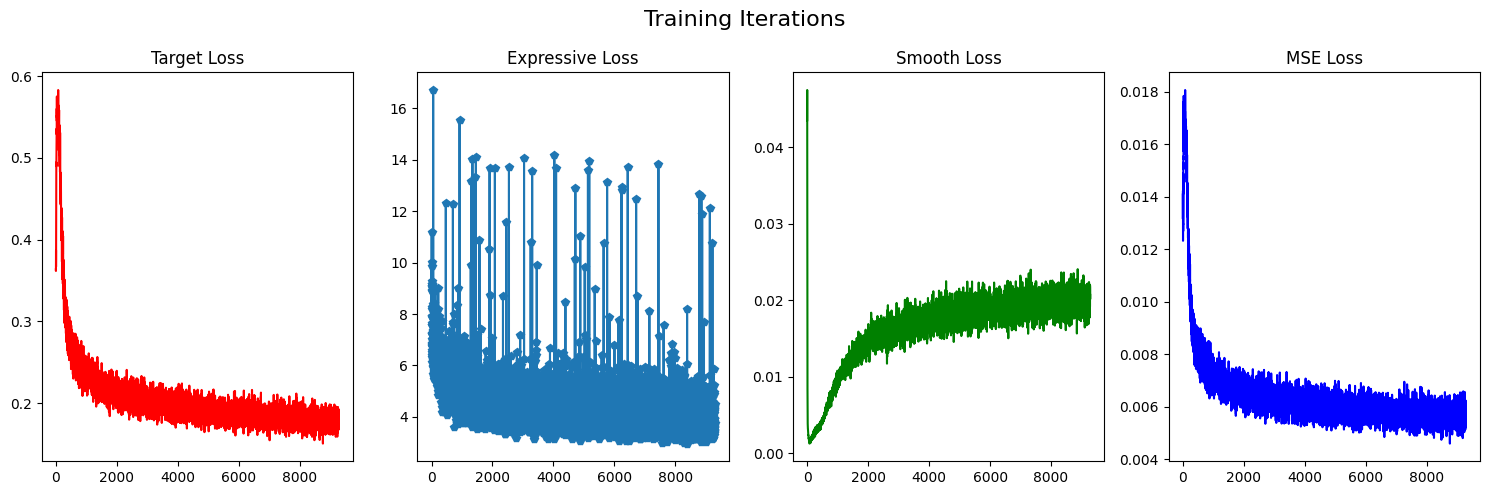

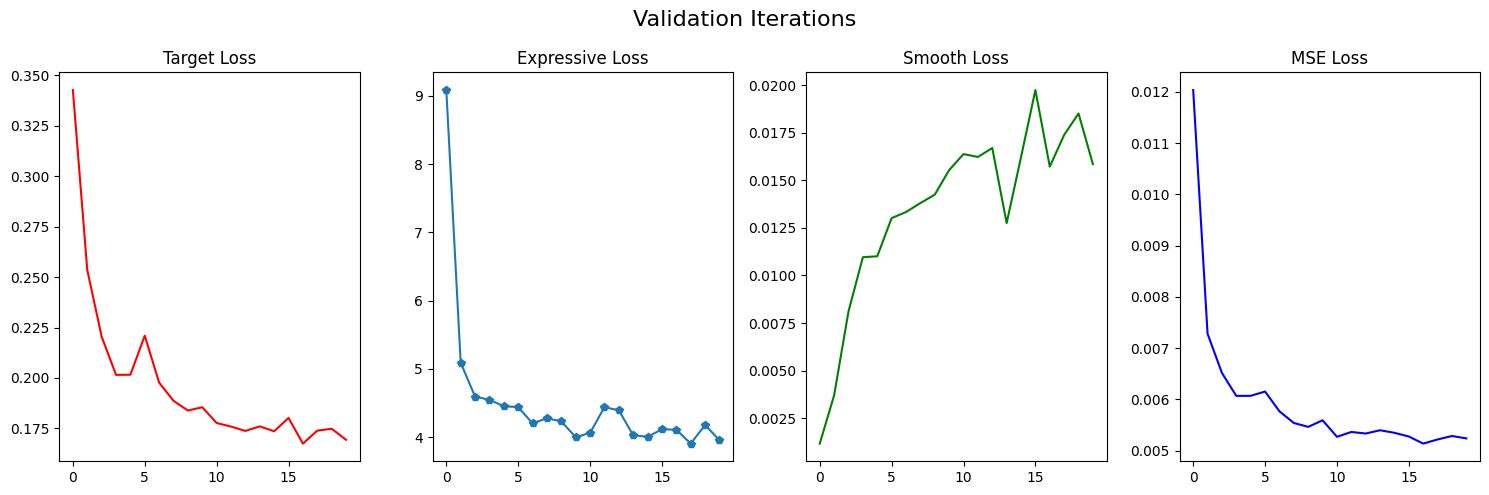

  0%|          | 0/1857 [00:00<?, ?it/s]

[5][0/1857]: [train] [target loss]: 0.18022963404655457 [exp loss]: 3.760798454284668 [smooth loss]: 0.019977986812591553 [mse]: 0.005872214718144787


  0%|          | 1/1857 [00:10<5:21:50, 10.40s/it]

[5][0/1857]: [val] [target loss]: 0.162353076338768 [exp loss]: 4.217373857498169 [smooth loss]: 0.018222596645355225 [mse]: 0.0049801455150414895


 11%|█         | 202/1857 [00:36<03:44,  7.38it/s]

[5][200/1857]: [train] [target loss]: 0.1747540533542633 [exp loss]: 3.9628026485443115 [smooth loss]: 0.02092534303665161 [mse]: 0.0056522989372462164


 22%|██▏       | 402/1857 [01:02<03:07,  7.74it/s]

[5][400/1857]: [train] [target loss]: 0.18604983389377594 [exp loss]: 4.138066291809082 [smooth loss]: 0.01924741268157959 [mse]: 0.005881036492508745


 32%|███▏      | 600/1857 [01:29<02:46,  7.54it/s]

[5][600/1857]: [train] [target loss]: 0.18012356758117676 [exp loss]: 3.8820159435272217 [smooth loss]: 0.02043783664703369 [mse]: 0.005575466243642048


 32%|███▏      | 602/1857 [01:38<42:53,  2.05s/it]

[5][600/1857]: [val] [target loss]: 0.16887281477451324 [exp loss]: 3.7453405380249025 [smooth loss]: 0.01875544786453247 [mse]: 0.005127157886077567


 43%|████▎     | 802/1857 [02:05<02:17,  7.68it/s]

[5][800/1857]: [train] [target loss]: 0.17539066076278687 [exp loss]: 3.810413122177124 [smooth loss]: 0.019063889980316162 [mse]: 0.005631810349856662


 54%|█████▍    | 1002/1857 [02:31<01:53,  7.56it/s]

[5][1000/1857]: [train] [target loss]: 0.1768171638250351 [exp loss]: 4.178454399108887 [smooth loss]: 0.01888859272003174 [mse]: 0.005569443324792038


 65%|██████▍   | 1200/1857 [02:57<01:27,  7.53it/s]

[5][1200/1857]: [train] [target loss]: 0.17593573033809662 [exp loss]: 3.829293727874756 [smooth loss]: 0.02063286304473877 [mse]: 0.005804094152810047


 65%|██████▍   | 1201/1857 [03:06<29:47,  2.72s/it]

[5][1200/1857]: [val] [target loss]: 0.1603267216682434 [exp loss]: 4.049590139389038 [smooth loss]: 0.017537832260131836 [mse]: 0.004950063160105777


 75%|███████▌  | 1402/1857 [03:33<01:00,  7.54it/s]

[5][1400/1857]: [train] [target loss]: 0.16792087256908417 [exp loss]: 3.2707104682922363 [smooth loss]: 0.01888066530227661 [mse]: 0.005284744441503947


 86%|████████▋ | 1602/1857 [03:59<00:33,  7.59it/s]

[5][1600/1857]: [train] [target loss]: 0.18199199438095093 [exp loss]: 3.808974266052246 [smooth loss]: 0.023348212242126465 [mse]: 0.005761575734581464


 97%|█████████▋| 1800/1857 [04:25<00:07,  7.67it/s]

[5][1800/1857]: [train] [target loss]: 0.1716502159833908 [exp loss]: 3.9951930046081543 [smooth loss]: 0.01819401979446411 [mse]: 0.005349017147212044


 97%|█████████▋| 1801/1857 [04:34<02:24,  2.58s/it]

[5][1800/1857]: [val] [target loss]: 0.1677079653739929 [exp loss]: 3.8781620502471923 [smooth loss]: 0.017423841953277588 [mse]: 0.0051755890613246255


100%|██████████| 1857/1857 [04:41<00:00,  6.59it/s]


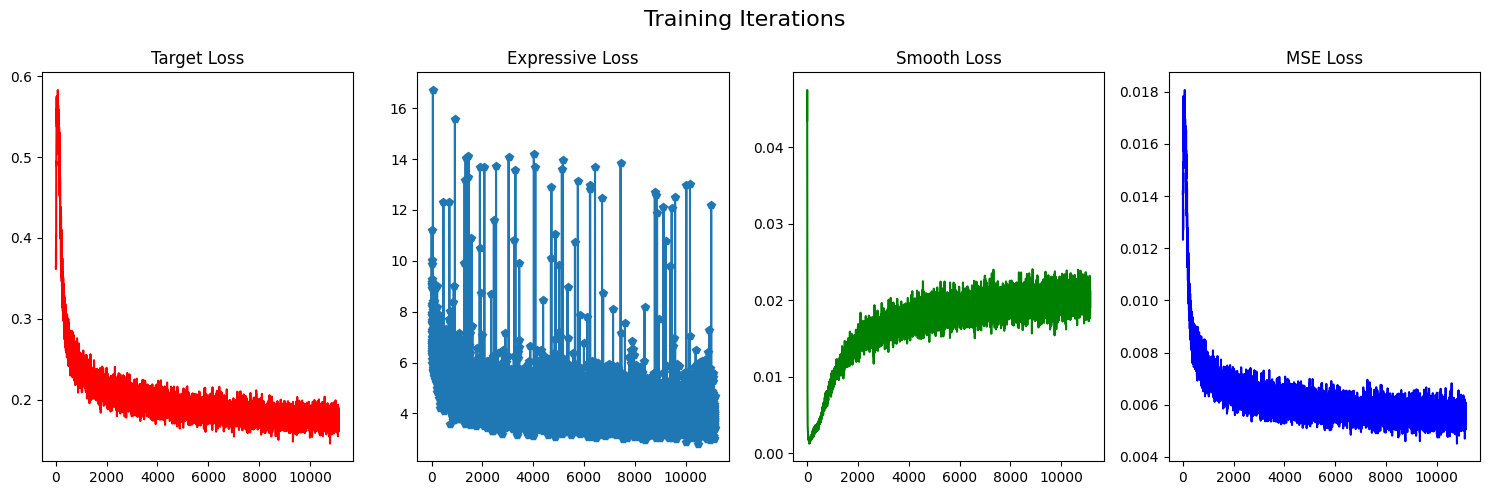

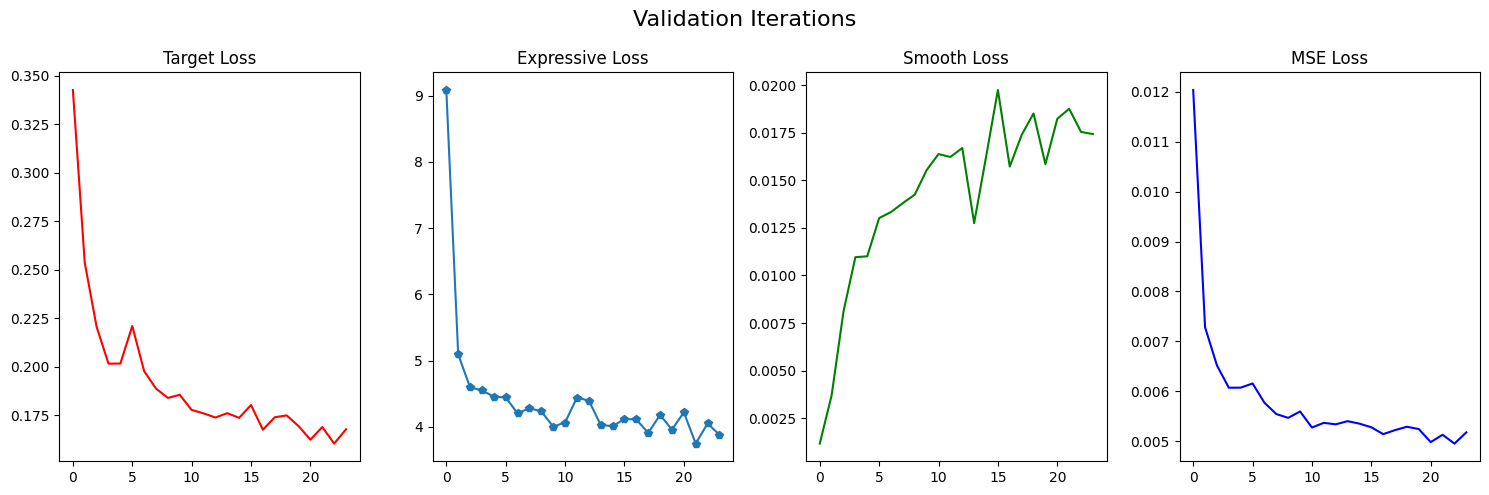

  0%|          | 0/1857 [00:00<?, ?it/s]

[6][0/1857]: [train] [target loss]: 0.16707463562488556 [exp loss]: 3.1970667839050293 [smooth loss]: 0.020582199096679688 [mse]: 0.005261757868992415


  0%|          | 2/1857 [00:08<1:48:56,  3.52s/it]

[6][0/1857]: [val] [target loss]: 0.16289812028408052 [exp loss]: 3.730761241912842 [smooth loss]: 0.01994382619857788 [mse]: 0.0049406054964198495


 11%|█         | 202/1857 [00:34<03:32,  7.80it/s]

[6][200/1857]: [train] [target loss]: 0.17224736511707306 [exp loss]: 3.4637563228607178 [smooth loss]: 0.01821690797805786 [mse]: 0.005686846092797477


 22%|██▏       | 402/1857 [01:01<03:10,  7.65it/s]

[6][400/1857]: [train] [target loss]: 0.17313554883003235 [exp loss]: 3.470027208328247 [smooth loss]: 0.01922595500946045 [mse]: 0.005280706358632044


 32%|███▏      | 600/1857 [01:27<02:43,  7.71it/s]

[6][600/1857]: [train] [target loss]: 0.15595202147960663 [exp loss]: 3.057199239730835 [smooth loss]: 0.018910467624664307 [mse]: 0.0048410057465646935


 32%|███▏      | 602/1857 [01:35<37:14,  1.78s/it]

[6][600/1857]: [val] [target loss]: 0.16020519852638246 [exp loss]: 3.7975204372406006 [smooth loss]: 0.018151142597198487 [mse]: 0.004939991020833642


 43%|████▎     | 802/1857 [02:01<02:17,  7.67it/s]

[6][800/1857]: [train] [target loss]: 0.18300455808639526 [exp loss]: 4.279795169830322 [smooth loss]: 0.02123028039932251 [mse]: 0.0059615877918391316


 54%|█████▍    | 1002/1857 [02:28<01:51,  7.69it/s]

[6][1000/1857]: [train] [target loss]: 0.1821654736995697 [exp loss]: 4.149067401885986 [smooth loss]: 0.020285606384277344 [mse]: 0.005815836672928936


 65%|██████▍   | 1200/1857 [02:54<01:25,  7.68it/s]

[6][1200/1857]: [train] [target loss]: 0.1668073683977127 [exp loss]: 3.592315196990967 [smooth loss]: 0.020848095417022705 [mse]: 0.00545260544772102


 65%|██████▍   | 1201/1857 [03:01<24:37,  2.25s/it]

[6][1200/1857]: [val] [target loss]: 0.15993112266063692 [exp loss]: 3.904930982589722 [smooth loss]: 0.017869322299957274 [mse]: 0.004920739181672885


 75%|███████▌  | 1402/1857 [03:28<00:59,  7.67it/s]

[6][1400/1857]: [train] [target loss]: 0.18969571590423584 [exp loss]: 4.935888290405273 [smooth loss]: 0.020486295223236084 [mse]: 0.006063021491794608


 86%|████████▋ | 1602/1857 [03:54<00:33,  7.69it/s]

[6][1600/1857]: [train] [target loss]: 0.17015616595745087 [exp loss]: 3.521519899368286 [smooth loss]: 0.022103488445281982 [mse]: 0.005494763786796248


 97%|█████████▋| 1800/1857 [04:20<00:07,  7.52it/s]

[6][1800/1857]: [train] [target loss]: 0.1658274382352829 [exp loss]: 3.8519654273986816 [smooth loss]: 0.01928567886352539 [mse]: 0.0050998382687786736


 97%|█████████▋| 1801/1857 [04:27<01:57,  2.09s/it]

[6][1800/1857]: [val] [target loss]: 0.15986215949058533 [exp loss]: 3.9288533306121827 [smooth loss]: 0.01732757568359375 [mse]: 0.0050080473535894735


100%|██████████| 1857/1857 [04:35<00:00,  6.75it/s]


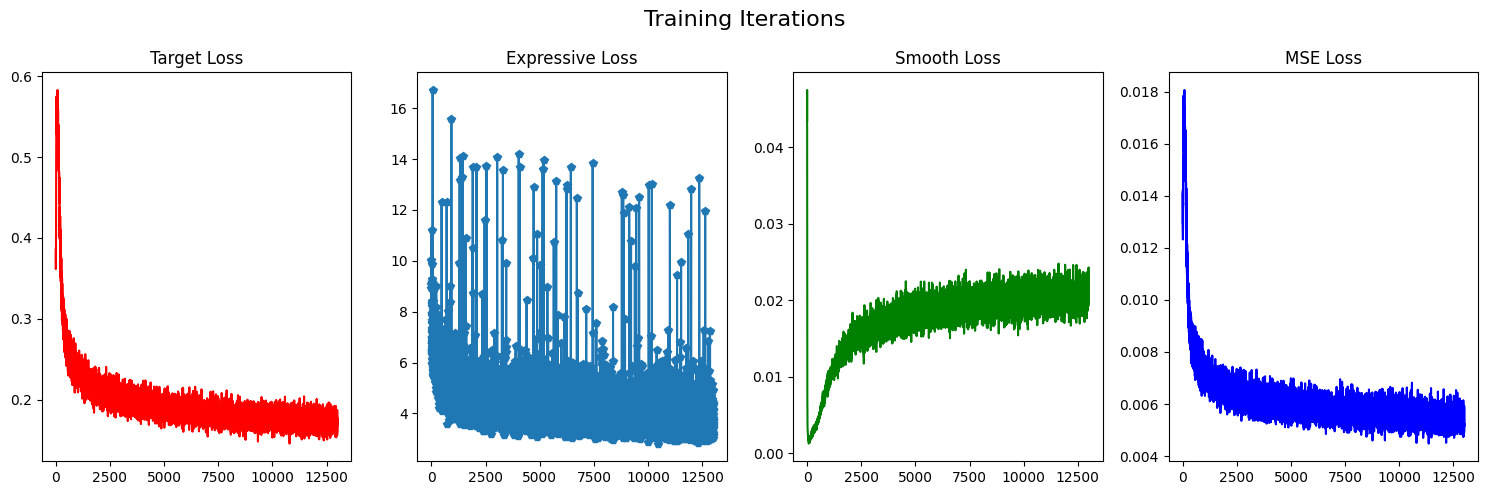

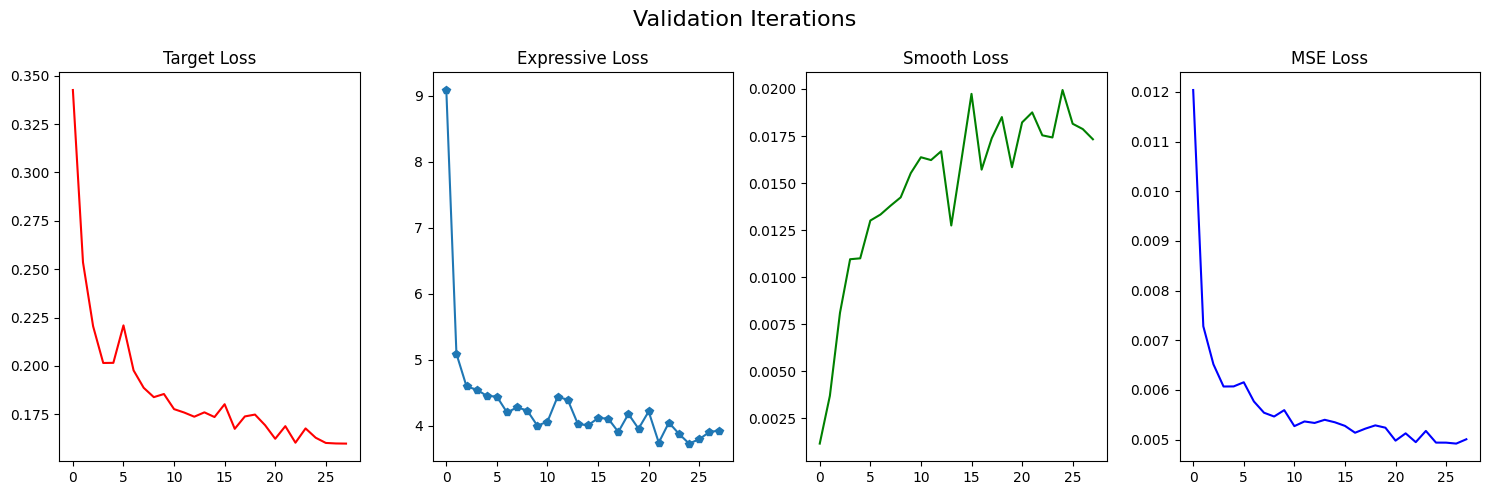

  0%|          | 0/1857 [00:00<?, ?it/s]

[7][0/1857]: [train] [target loss]: 0.16710980236530304 [exp loss]: 3.766010046005249 [smooth loss]: 0.022440075874328613 [mse]: 0.005135138843992178


  0%|          | 1/1857 [00:06<3:22:30,  6.55s/it]

[7][0/1857]: [val] [target loss]: 0.16932886183261872 [exp loss]: 4.108464965820312 [smooth loss]: 0.020508370399475097 [mse]: 0.005055620357385024


 11%|█         | 202/1857 [00:33<03:38,  7.58it/s]

[7][200/1857]: [train] [target loss]: 0.1706184595823288 [exp loss]: 3.825547218322754 [smooth loss]: 0.021521925926208496 [mse]: 0.005429015377050156


 22%|██▏       | 402/1857 [00:59<03:09,  7.67it/s]

[7][400/1857]: [train] [target loss]: 0.17345920205116272 [exp loss]: 3.9471542835235596 [smooth loss]: 0.022567927837371826 [mse]: 0.005483638799622849


 32%|███▏      | 600/1857 [01:25<02:46,  7.53it/s]

[7][600/1857]: [train] [target loss]: 0.17307420074939728 [exp loss]: 3.9714162349700928 [smooth loss]: 0.019707024097442627 [mse]: 0.005788654084851025


 32%|███▏      | 601/1857 [01:32<42:23,  2.03s/it]

[7][600/1857]: [val] [target loss]: 0.16546541273593904 [exp loss]: 3.897402400970459 [smooth loss]: 0.018383243083953858 [mse]: 0.0051140448800496684


 43%|████▎     | 802/1857 [01:58<02:19,  7.58it/s]

[7][800/1857]: [train] [target loss]: 0.1747063547372818 [exp loss]: 5.427563667297363 [smooth loss]: 0.022094249725341797 [mse]: 0.005679702567951396


 54%|█████▍    | 1002/1857 [02:25<01:53,  7.55it/s]

[7][1000/1857]: [train] [target loss]: 0.16785797476768494 [exp loss]: 4.114203929901123 [smooth loss]: 0.021272122859954834 [mse]: 0.005334131614437676


 65%|██████▍   | 1200/1857 [02:51<01:25,  7.66it/s]

[7][1200/1857]: [train] [target loss]: 0.17443601787090302 [exp loss]: 3.9411864280700684 [smooth loss]: 0.019287288188934326 [mse]: 0.005511897755316054


 65%|██████▍   | 1202/1857 [02:57<14:16,  1.31s/it]

[7][1200/1857]: [val] [target loss]: 0.1640990424156189 [exp loss]: 4.056336297988891 [smooth loss]: 0.018586170673370362 [mse]: 0.004967368226205058


 75%|███████▌  | 1402/1857 [03:23<01:00,  7.57it/s]

[7][1400/1857]: [train] [target loss]: 0.1557389795780182 [exp loss]: 3.3775339126586914 [smooth loss]: 0.02159970998764038 [mse]: 0.004841881428774877


 86%|████████▋ | 1602/1857 [03:50<00:33,  7.62it/s]

[7][1600/1857]: [train] [target loss]: 0.16789653897285461 [exp loss]: 3.4510977268218994 [smooth loss]: 0.020457148551940918 [mse]: 0.005661659257486312


 97%|█████████▋| 1800/1857 [04:16<00:07,  7.58it/s]

[7][1800/1857]: [train] [target loss]: 0.1572786569595337 [exp loss]: 3.629920482635498 [smooth loss]: 0.019180715084075928 [mse]: 0.0049520804293707995


 97%|█████████▋| 1802/1857 [04:22<01:13,  1.33s/it]

[7][1800/1857]: [val] [target loss]: 0.16004460871219636 [exp loss]: 4.147364387512207 [smooth loss]: 0.019939978122711182 [mse]: 0.00490150525166054


100%|██████████| 1857/1857 [04:30<00:00,  6.88it/s]


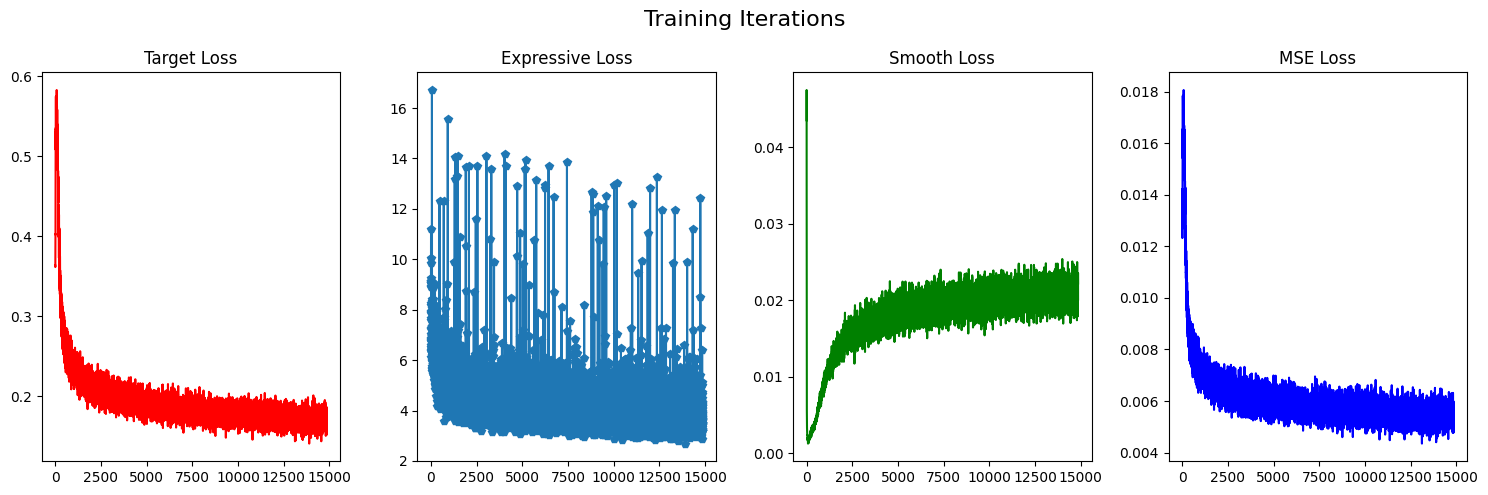

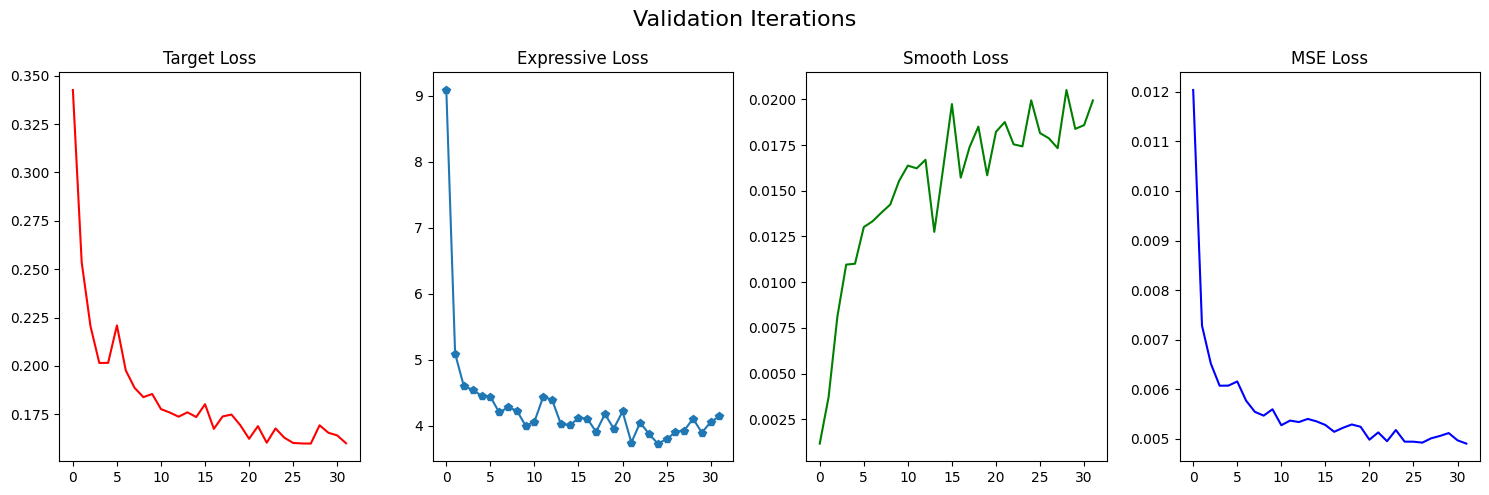

  0%|          | 0/1857 [00:00<?, ?it/s]

[8][0/1857]: [train] [target loss]: 0.16651257872581482 [exp loss]: 3.560922384262085 [smooth loss]: 0.02148735523223877 [mse]: 0.005542959793847421


  0%|          | 2/1857 [00:05<1:13:22,  2.37s/it]

[8][0/1857]: [val] [target loss]: 0.1769646829366684 [exp loss]: 4.047017431259155 [smooth loss]: 0.02130199670791626 [mse]: 0.005228529536427047


 11%|█         | 202/1857 [00:32<03:35,  7.69it/s]

[8][200/1857]: [train] [target loss]: 0.16027550399303436 [exp loss]: 3.5202393531799316 [smooth loss]: 0.020277738571166992 [mse]: 0.005079269678409847


 22%|██▏       | 402/1857 [00:58<03:09,  7.69it/s]

[8][400/1857]: [train] [target loss]: 0.1782364845275879 [exp loss]: 3.7724897861480713 [smooth loss]: 0.020116806030273438 [mse]: 0.005876012254917919


 32%|███▏      | 600/1857 [01:24<02:43,  7.71it/s]

[8][600/1857]: [train] [target loss]: 0.15985283255577087 [exp loss]: 4.02696418762207 [smooth loss]: 0.021367371082305908 [mse]: 0.00499691056398591


 32%|███▏      | 602/1857 [01:30<25:22,  1.21s/it]

[8][600/1857]: [val] [target loss]: 0.1553129732608795 [exp loss]: 4.049383182525634 [smooth loss]: 0.01773224592208862 [mse]: 0.004838478657121035


 43%|████▎     | 802/1857 [01:56<02:18,  7.59it/s]

[8][800/1857]: [train] [target loss]: 0.164663165807724 [exp loss]: 3.2182397842407227 [smooth loss]: 0.021982550621032715 [mse]: 0.005354313800244874


 54%|█████▍    | 1002/1857 [02:23<01:52,  7.58it/s]

[8][1000/1857]: [train] [target loss]: 0.16888616979122162 [exp loss]: 3.6716742515563965 [smooth loss]: 0.02151811122894287 [mse]: 0.00566732380384018


 65%|██████▍   | 1200/1857 [02:49<01:27,  7.53it/s]

[8][1200/1857]: [train] [target loss]: 0.17358900606632233 [exp loss]: 3.775242567062378 [smooth loss]: 0.020558416843414307 [mse]: 0.005714016713274262


 65%|██████▍   | 1202/1857 [02:54<11:51,  1.09s/it]

[8][1200/1857]: [val] [target loss]: 0.16315776348114014 [exp loss]: 3.799127321243286 [smooth loss]: 0.019671781063079832 [mse]: 0.00497478192121498


 75%|███████▌  | 1402/1857 [03:20<00:59,  7.64it/s]

[8][1400/1857]: [train] [target loss]: 0.16298578679561615 [exp loss]: 3.180135488510132 [smooth loss]: 0.02061748504638672 [mse]: 0.005457960293339686


 86%|████████▋ | 1602/1857 [03:46<00:33,  7.65it/s]

[8][1600/1857]: [train] [target loss]: 0.16883720457553864 [exp loss]: 3.4523959159851074 [smooth loss]: 0.022653043270111084 [mse]: 0.0055024930122168445


 97%|█████████▋| 1800/1857 [04:13<00:07,  7.65it/s]

[8][1800/1857]: [train] [target loss]: 0.15708321332931519 [exp loss]: 3.3260107040405273 [smooth loss]: 0.02049863338470459 [mse]: 0.005178585216469173


 97%|█████████▋| 1802/1857 [04:18<01:00,  1.09s/it]

[8][1800/1857]: [val] [target loss]: 0.15886365473270417 [exp loss]: 3.973851661682129 [smooth loss]: 0.01987534523010254 [mse]: 0.004898500917199411


100%|██████████| 1857/1857 [04:25<00:00,  7.00it/s]


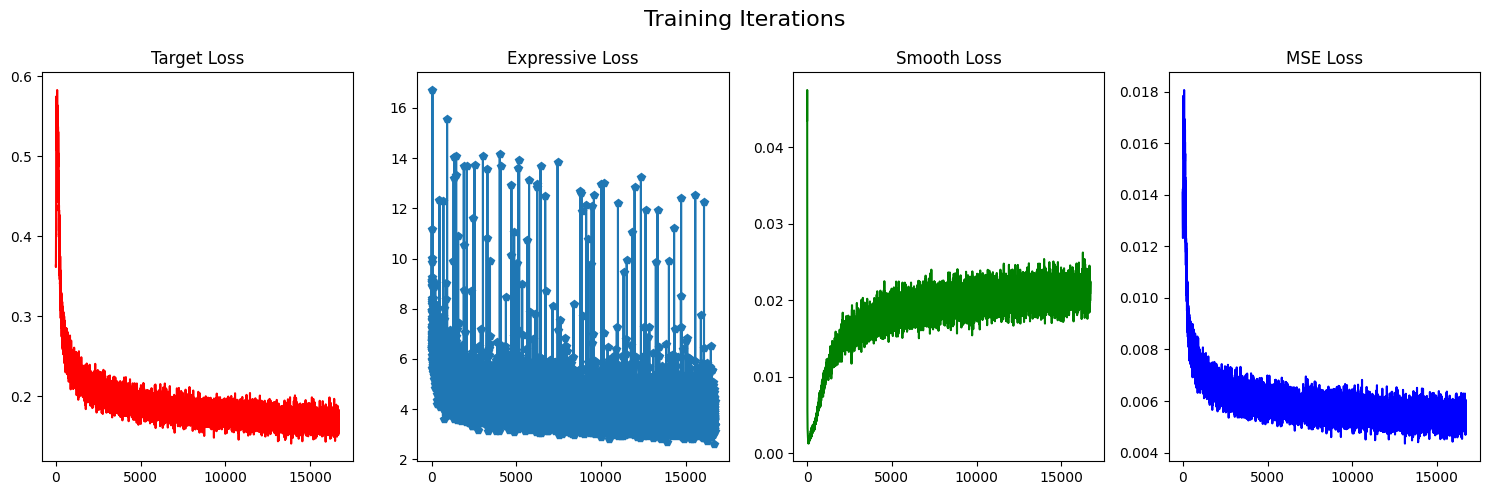

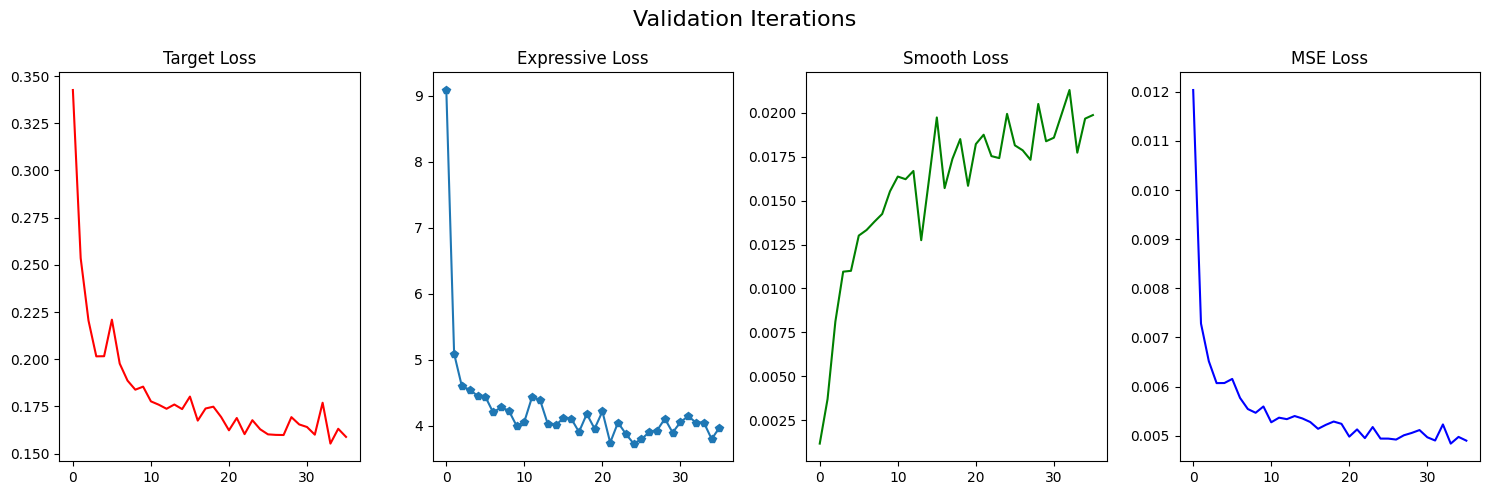

  0%|          | 0/1857 [00:00<?, ?it/s]

[9][0/1857]: [train] [target loss]: 0.1638486236333847 [exp loss]: 3.4093453884124756 [smooth loss]: 0.021904051303863525 [mse]: 0.00523417031944135


  0%|          | 2/1857 [00:04<59:29,  1.92s/it]  

[9][0/1857]: [val] [target loss]: 0.15837452054023743 [exp loss]: 3.8359349536895753 [smooth loss]: 0.016759278774261473 [mse]: 0.004865674650326849


 11%|█         | 202/1857 [00:31<03:37,  7.62it/s]

[9][200/1857]: [train] [target loss]: 0.16309209167957306 [exp loss]: 3.3210465908050537 [smooth loss]: 0.019373774528503418 [mse]: 0.005307023342803944


 22%|██▏       | 402/1857 [00:57<03:08,  7.74it/s]

[9][400/1857]: [train] [target loss]: 0.15872304141521454 [exp loss]: 3.4741358757019043 [smooth loss]: 0.02313828468322754 [mse]: 0.004970566876223398


 32%|███▏      | 600/1857 [01:23<02:47,  7.51it/s]

[9][600/1857]: [train] [target loss]: 0.16732610762119293 [exp loss]: 3.363464117050171 [smooth loss]: 0.020516932010650635 [mse]: 0.005153054765085792


 32%|███▏      | 602/1857 [01:27<20:23,  1.03it/s]

[9][600/1857]: [val] [target loss]: 0.16559331357479096 [exp loss]: 3.944748754501343 [smooth loss]: 0.01840606451034546 [mse]: 0.004942597384534943


 43%|████▎     | 802/1857 [01:53<02:20,  7.49it/s]

[9][800/1857]: [train] [target loss]: 0.16015955805778503 [exp loss]: 3.435751438140869 [smooth loss]: 0.021234869956970215 [mse]: 0.005088180744631522


 54%|█████▍    | 1002/1857 [02:20<01:51,  7.65it/s]

[9][1000/1857]: [train] [target loss]: 0.17740076780319214 [exp loss]: 4.0949249267578125 [smooth loss]: 0.02404540777206421 [mse]: 0.005558375184300623


 65%|██████▍   | 1200/1857 [02:46<01:28,  7.46it/s]

[9][1200/1857]: [train] [target loss]: 0.17883208394050598 [exp loss]: 3.973106861114502 [smooth loss]: 0.01805734634399414 [mse]: 0.005580088137593052


 65%|██████▍   | 1202/1857 [02:50<11:26,  1.05s/it]

[9][1200/1857]: [val] [target loss]: 0.1569412922859192 [exp loss]: 3.706396245956421 [smooth loss]: 0.018789868354797363 [mse]: 0.004865110017072063


 75%|███████▌  | 1402/1857 [03:17<00:59,  7.59it/s]

[9][1400/1857]: [train] [target loss]: 0.1608356386423111 [exp loss]: 3.43516206741333 [smooth loss]: 0.021995067596435547 [mse]: 0.0051615400544080215


 86%|████████▋ | 1602/1857 [03:43<00:33,  7.59it/s]

[9][1600/1857]: [train] [target loss]: 0.1454744040966034 [exp loss]: 2.855651378631592 [smooth loss]: 0.019174277782440186 [mse]: 0.0044831672989697055


 97%|█████████▋| 1800/1857 [04:10<00:07,  7.63it/s]

[9][1800/1857]: [train] [target loss]: 0.16101598739624023 [exp loss]: 3.4847471714019775 [smooth loss]: 0.01876354217529297 [mse]: 0.0051935144390085255


 97%|█████████▋| 1802/1857 [04:13<00:45,  1.21it/s]

[9][1800/1857]: [val] [target loss]: 0.1533365446329117 [exp loss]: 3.6398810863494875 [smooth loss]: 0.01868407964706421 [mse]: 0.004807401251750447


100%|██████████| 1857/1857 [04:20<00:00,  7.12it/s]


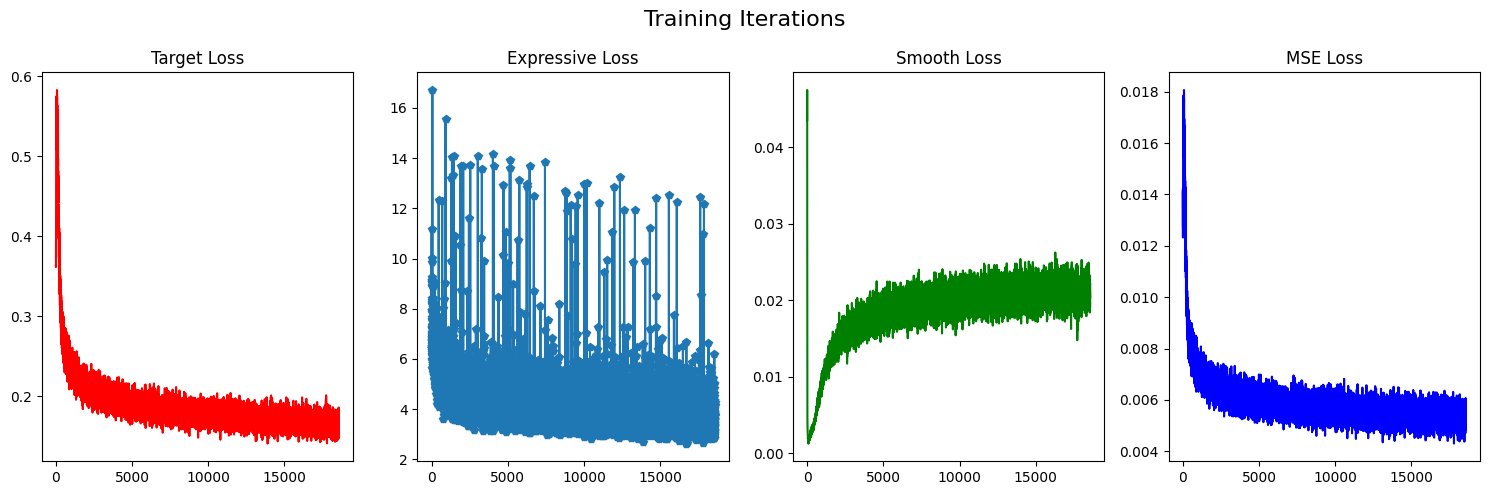

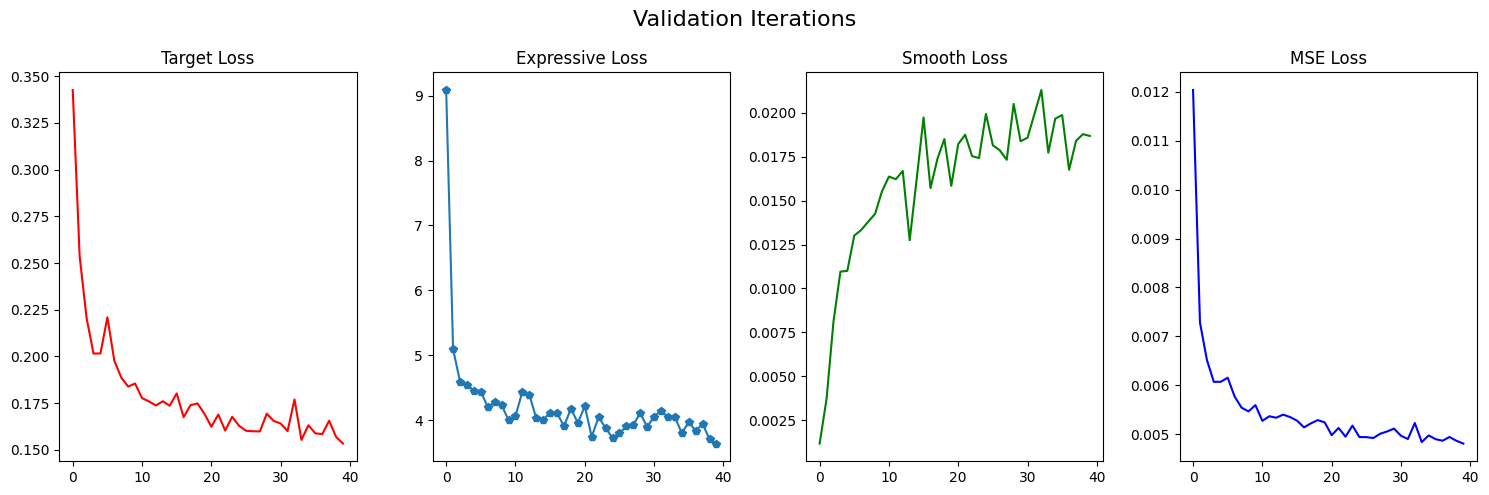

  0%|          | 0/1857 [00:00<?, ?it/s]

[10][0/1857]: [train] [target loss]: 0.17501989006996155 [exp loss]: 4.11351203918457 [smooth loss]: 0.021493256092071533 [mse]: 0.005598328279879395


  0%|          | 2/1857 [00:03<49:05,  1.59s/it]  

[10][0/1857]: [val] [target loss]: 0.1590084093809128 [exp loss]: 4.848638954162598 [smooth loss]: 0.019237189292907714 [mse]: 0.004848025108440473


 11%|█         | 202/1857 [00:30<03:34,  7.73it/s]

[10][200/1857]: [train] [target loss]: 0.177961528301239 [exp loss]: 3.542792320251465 [smooth loss]: 0.021526634693145752 [mse]: 0.005539844673796751


 22%|██▏       | 402/1857 [00:56<03:10,  7.64it/s]

[10][400/1857]: [train] [target loss]: 0.16042129695415497 [exp loss]: 3.3178436756134033 [smooth loss]: 0.02365875244140625 [mse]: 0.004939758843955971


 32%|███▏      | 600/1857 [01:22<02:46,  7.54it/s]

[10][600/1857]: [train] [target loss]: 0.17366895079612732 [exp loss]: 3.6945292949676514 [smooth loss]: 0.02274167537689209 [mse]: 0.005551526596048511


 32%|███▏      | 602/1857 [01:26<18:52,  1.11it/s]

[10][600/1857]: [val] [target loss]: 0.1670694661140442 [exp loss]: 4.035262203216552 [smooth loss]: 0.020857369899749754 [mse]: 0.005016910980813113


 43%|████▎     | 802/1857 [01:53<02:18,  7.60it/s]

[10][800/1857]: [train] [target loss]: 0.1667787730693817 [exp loss]: 3.577739715576172 [smooth loss]: 0.021461665630340576 [mse]: 0.005600256596785694


 54%|█████▍    | 1002/1857 [02:19<01:51,  7.63it/s]

[10][1000/1857]: [train] [target loss]: 0.16340261697769165 [exp loss]: 4.18961763381958 [smooth loss]: 0.020519137382507324 [mse]: 0.005232715445507694


 65%|██████▍   | 1200/1857 [02:45<01:27,  7.53it/s]

[10][1200/1857]: [train] [target loss]: 0.16076800227165222 [exp loss]: 3.337717294692993 [smooth loss]: 0.023804008960723877 [mse]: 0.005092785627822644


 65%|██████▍   | 1202/1857 [02:49<08:56,  1.22it/s]

[10][1200/1857]: [val] [target loss]: 0.15744754195213317 [exp loss]: 3.762985877990723 [smooth loss]: 0.01976111888885498 [mse]: 0.00482114203888887


 75%|███████▌  | 1402/1857 [03:15<01:00,  7.53it/s]

[10][1400/1857]: [train] [target loss]: 0.15865884721279144 [exp loss]: 3.2425754070281982 [smooth loss]: 0.02250492572784424 [mse]: 0.0052188799979462405


 86%|████████▋ | 1602/1857 [03:42<00:33,  7.71it/s]

[10][1600/1857]: [train] [target loss]: 0.1533653736114502 [exp loss]: 3.8987488746643066 [smooth loss]: 0.02091193199157715 [mse]: 0.004817099632727472


 97%|█████████▋| 1800/1857 [04:08<00:07,  7.65it/s]

[10][1800/1857]: [train] [target loss]: 0.1625576615333557 [exp loss]: 3.9577932357788086 [smooth loss]: 0.02224820852279663 [mse]: 0.00507716708607679


 97%|█████████▋| 1802/1857 [04:12<00:46,  1.19it/s]

[10][1800/1857]: [val] [target loss]: 0.15896567225456237 [exp loss]: 3.779810838699341 [smooth loss]: 0.018492047786712647 [mse]: 0.004911727087877868


100%|██████████| 1857/1857 [04:19<00:00,  7.15it/s]


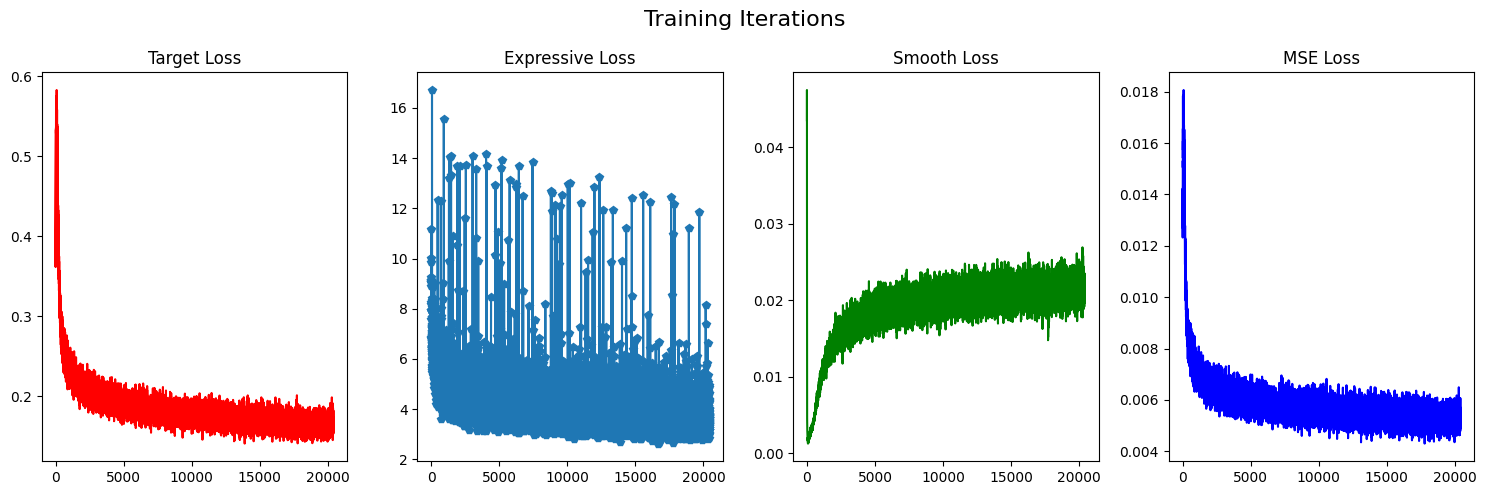

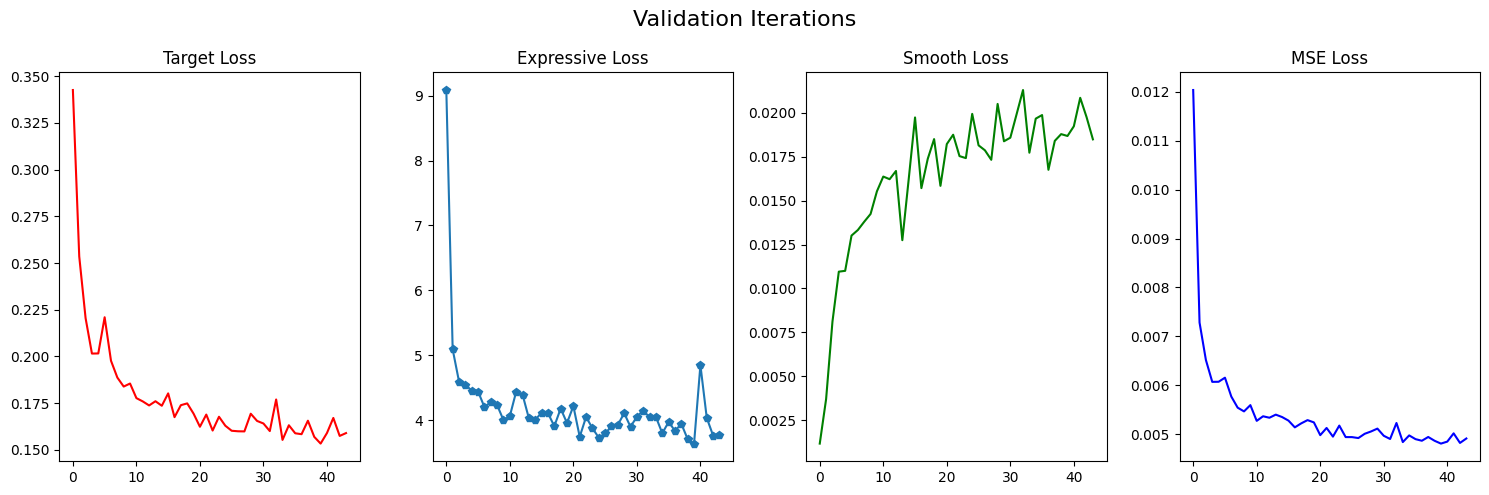

  0%|          | 0/1857 [00:00<?, ?it/s]

[11][0/1857]: [train] [target loss]: 0.1618354618549347 [exp loss]: 3.344064235687256 [smooth loss]: 0.022035956382751465 [mse]: 0.005143642263783328


  0%|          | 2/1857 [00:03<41:33,  1.34s/it]  

[11][0/1857]: [val] [target loss]: 0.1535050803422928 [exp loss]: 3.711373414993286 [smooth loss]: 0.01965303421020508 [mse]: 0.004764513896042244


 11%|█         | 202/1857 [00:29<03:36,  7.66it/s]

[11][200/1857]: [train] [target loss]: 0.15693268179893494 [exp loss]: 3.1587040424346924 [smooth loss]: 0.020657360553741455 [mse]: 0.00505654360475027


 22%|██▏       | 402/1857 [00:56<03:10,  7.65it/s]

[11][400/1857]: [train] [target loss]: 0.1595880538225174 [exp loss]: 3.576018810272217 [smooth loss]: 0.020594477653503418 [mse]: 0.00502504324988447


 32%|███▏      | 600/1857 [01:22<02:50,  7.39it/s]

[11][600/1857]: [train] [target loss]: 0.15445327758789062 [exp loss]: 3.4214258193969727 [smooth loss]: 0.022148191928863525 [mse]: 0.005159458896195543


 32%|███▏      | 602/1857 [01:25<15:15,  1.37it/s]

[11][600/1857]: [val] [target loss]: 0.15136363327503205 [exp loss]: 3.6260405349731446 [smooth loss]: 0.017994587421417237 [mse]: 0.004778204424948095


 43%|████▎     | 802/1857 [01:51<02:17,  7.66it/s]

[11][800/1857]: [train] [target loss]: 0.15404832363128662 [exp loss]: 2.991112232208252 [smooth loss]: 0.0205116868019104 [mse]: 0.004887902411443461


 54%|█████▍    | 1002/1857 [02:18<01:51,  7.65it/s]

[11][1000/1857]: [train] [target loss]: 0.1601835936307907 [exp loss]: 3.4554479122161865 [smooth loss]: 0.0210874080657959 [mse]: 0.005026047850876789


 65%|██████▍   | 1200/1857 [02:44<01:27,  7.51it/s]

[11][1200/1857]: [train] [target loss]: 0.17828220129013062 [exp loss]: 4.927205562591553 [smooth loss]: 0.02361893653869629 [mse]: 0.005788498871207013


 65%|██████▍   | 1202/1857 [02:47<08:18,  1.31it/s]

[11][1200/1857]: [val] [target loss]: 0.15253858089447023 [exp loss]: 3.703115911483765 [smooth loss]: 0.019362311363220214 [mse]: 0.004772845264105217


 75%|███████▌  | 1402/1857 [03:14<00:59,  7.69it/s]

[11][1400/1857]: [train] [target loss]: 0.14258401095867157 [exp loss]: 2.7229297161102295 [smooth loss]: 0.02123570442199707 [mse]: 0.004591427368286971


 86%|████████▋ | 1602/1857 [03:40<00:33,  7.62it/s]

[11][1600/1857]: [train] [target loss]: 0.17541807889938354 [exp loss]: 4.501987934112549 [smooth loss]: 0.021712541580200195 [mse]: 0.005747997684630407


 97%|█████████▋| 1800/1857 [04:06<00:07,  7.64it/s]

[11][1800/1857]: [train] [target loss]: 0.17441195249557495 [exp loss]: 3.972752332687378 [smooth loss]: 0.022857189178466797 [mse]: 0.005550806204521809


 97%|█████████▋| 1802/1857 [04:09<00:37,  1.47it/s]

[11][1800/1857]: [val] [target loss]: 0.15857816815376283 [exp loss]: 3.70487099647522 [smooth loss]: 0.02038697004318237 [mse]: 0.004878280048501074


100%|██████████| 1857/1857 [04:17<00:00,  7.22it/s]


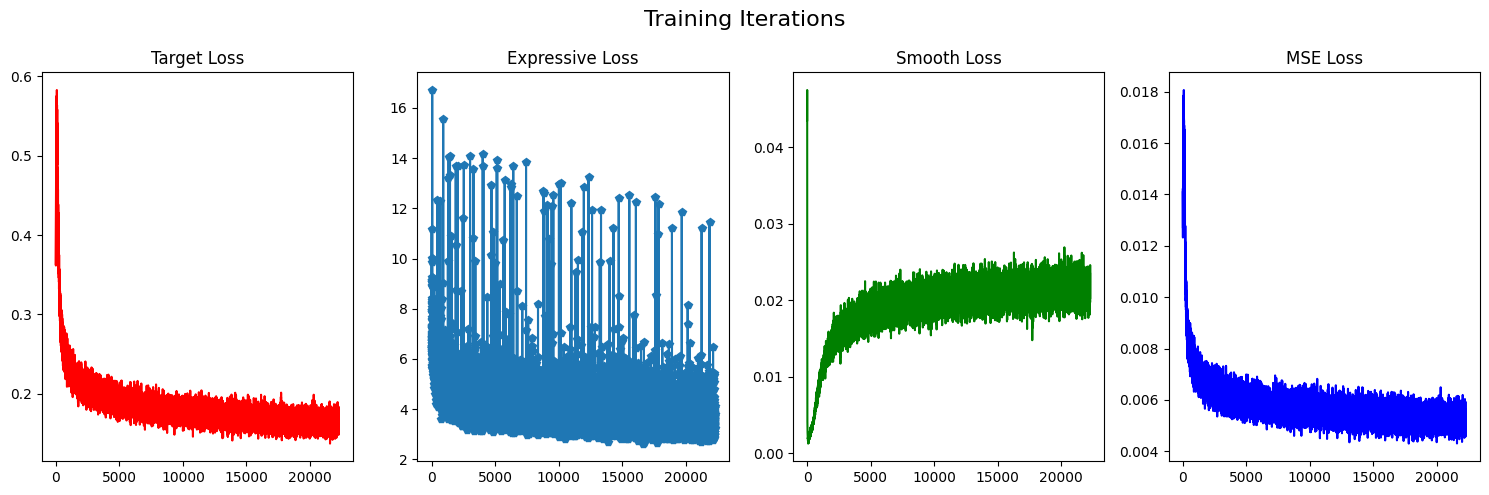

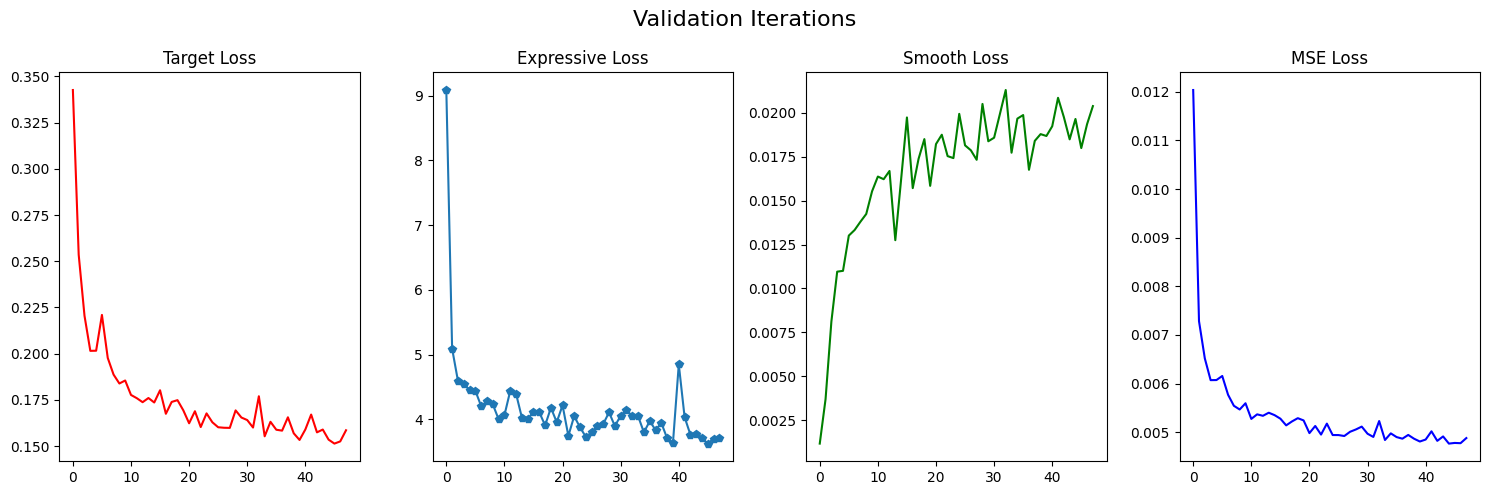

  0%|          | 0/1857 [00:00<?, ?it/s]

[12][0/1857]: [train] [target loss]: 0.15803666412830353 [exp loss]: 3.50688099861145 [smooth loss]: 0.02144402265548706 [mse]: 0.005205671135913403


  0%|          | 2/1857 [00:02<38:43,  1.25s/it]  

[12][0/1857]: [val] [target loss]: 0.15281898498535157 [exp loss]: 3.7016309261322022 [smooth loss]: 0.01896731376647949 [mse]: 0.004757244345455453


 11%|█         | 202/1857 [00:29<03:33,  7.75it/s]

[12][200/1857]: [train] [target loss]: 0.15766991674900055 [exp loss]: 3.169994592666626 [smooth loss]: 0.021305859088897705 [mse]: 0.004886699545676996


 22%|██▏       | 402/1857 [00:55<03:09,  7.68it/s]

[12][400/1857]: [train] [target loss]: 0.16129669547080994 [exp loss]: 3.574514150619507 [smooth loss]: 0.020799636840820312 [mse]: 0.005272643945441485


 32%|███▏      | 600/1857 [01:21<02:46,  7.53it/s]

[12][600/1857]: [train] [target loss]: 0.18133556842803955 [exp loss]: 4.798835277557373 [smooth loss]: 0.02195531129837036 [mse]: 0.005805570021845312


 32%|███▏      | 602/1857 [01:24<13:52,  1.51it/s]

[12][600/1857]: [val] [target loss]: 0.15121544182300567 [exp loss]: 3.7486803913116455 [smooth loss]: 0.018793487548828126 [mse]: 0.004757464868797294


 43%|████▎     | 802/1857 [01:50<02:20,  7.50it/s]

[12][800/1857]: [train] [target loss]: 0.16958007216453552 [exp loss]: 3.665189504623413 [smooth loss]: 0.018389105796813965 [mse]: 0.005470933203246211


 54%|█████▍    | 1002/1857 [02:17<01:51,  7.68it/s]

[12][1000/1857]: [train] [target loss]: 0.1697145402431488 [exp loss]: 4.0004658699035645 [smooth loss]: 0.02159219980239868 [mse]: 0.005340277403393918


 65%|██████▍   | 1200/1857 [02:43<01:25,  7.66it/s]

[12][1200/1857]: [train] [target loss]: 0.15249714255332947 [exp loss]: 2.9191877841949463 [smooth loss]: 0.021214783191680908 [mse]: 0.00486759679496587


 65%|██████▍   | 1202/1857 [02:46<07:26,  1.47it/s]

[12][1200/1857]: [val] [target loss]: 0.1637631720304489 [exp loss]: 4.31070993423462 [smooth loss]: 0.020307433605194092 [mse]: 0.004903306445550539


 75%|███████▌  | 1402/1857 [03:12<00:59,  7.60it/s]

[12][1400/1857]: [train] [target loss]: 0.1749366819858551 [exp loss]: 4.705011367797852 [smooth loss]: 0.019702553749084473 [mse]: 0.005432463628993428


 86%|████████▋ | 1602/1857 [03:39<00:33,  7.66it/s]

[12][1600/1857]: [train] [target loss]: 0.15440699458122253 [exp loss]: 3.05288028717041 [smooth loss]: 0.021448254585266113 [mse]: 0.004726289857763687


 97%|█████████▋| 1800/1857 [04:05<00:07,  7.64it/s]

[12][1800/1857]: [train] [target loss]: 0.1571853756904602 [exp loss]: 4.519549369812012 [smooth loss]: 0.019846439361572266 [mse]: 0.0050000028917056225


 97%|█████████▋| 1802/1857 [04:08<00:39,  1.40it/s]

[12][1800/1857]: [val] [target loss]: 0.15515131771564483 [exp loss]: 3.794804754257202 [smooth loss]: 0.019087743759155274 [mse]: 0.004806670765250393


100%|██████████| 1857/1857 [04:15<00:00,  7.26it/s]


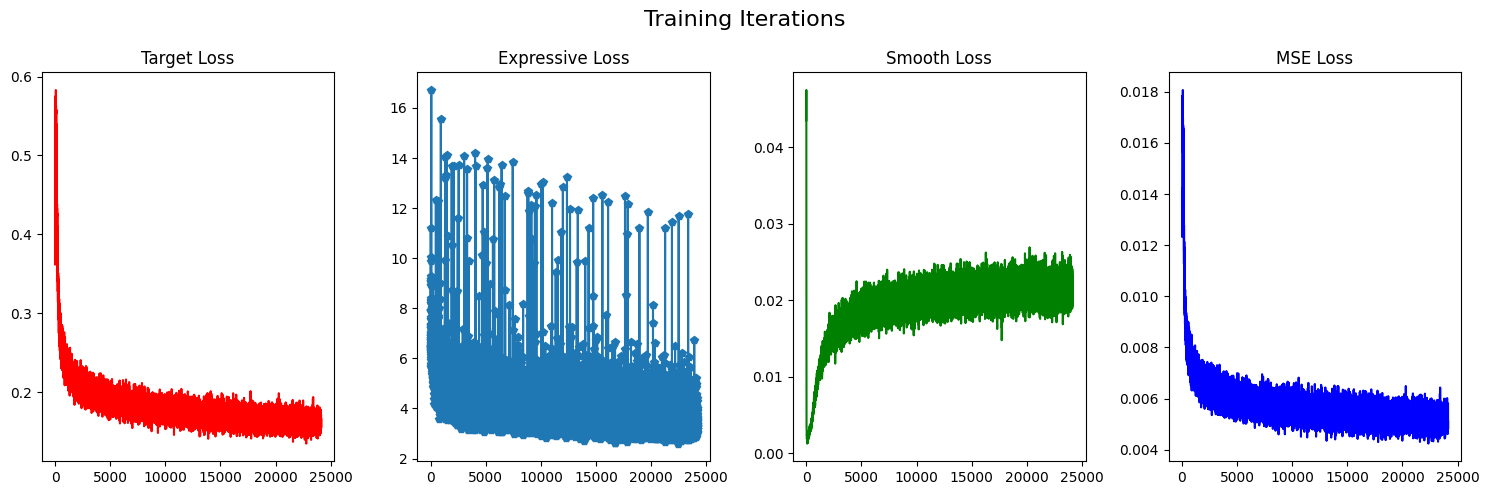

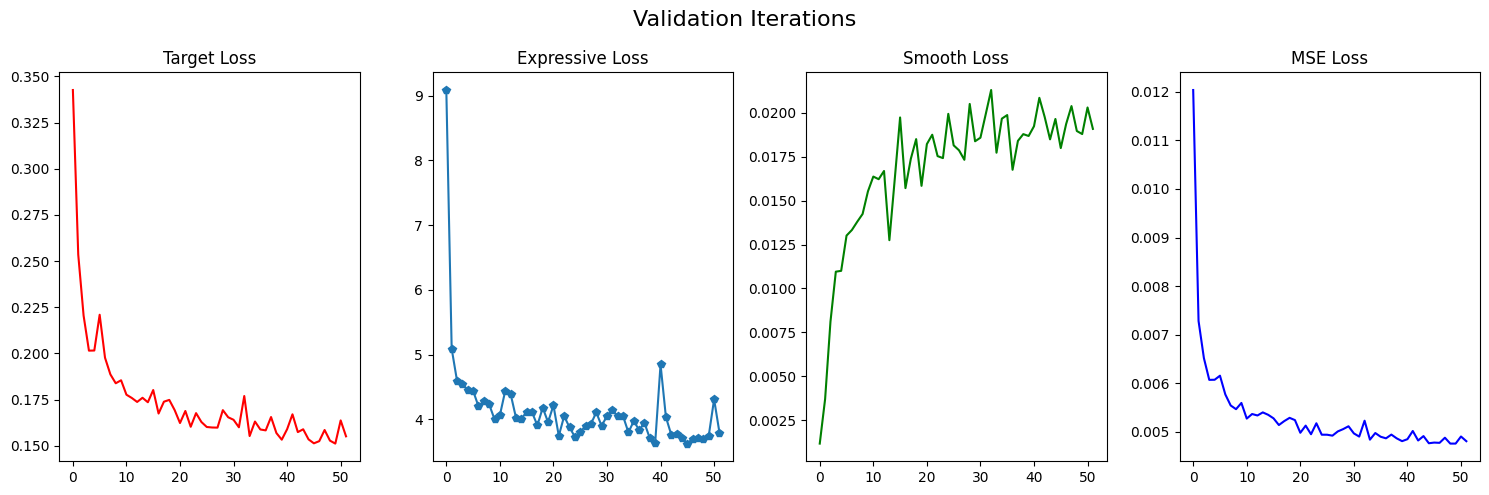

  0%|          | 0/1857 [00:00<?, ?it/s]

[13][0/1857]: [train] [target loss]: 0.17333640158176422 [exp loss]: 3.883770704269409 [smooth loss]: 0.0202254056930542 [mse]: 0.005550986011479773


  0%|          | 2/1857 [00:02<34:31,  1.12s/it]  

[13][0/1857]: [val] [target loss]: 0.155281583070755 [exp loss]: 3.7129398727416993 [smooth loss]: 0.02056882858276367 [mse]: 0.004748534293524721


 11%|█         | 202/1857 [00:29<03:34,  7.72it/s]

[13][200/1857]: [train] [target loss]: 0.1759992241859436 [exp loss]: 3.744828701019287 [smooth loss]: 0.02390289306640625 [mse]: 0.005641511548826239


 22%|██▏       | 402/1857 [00:55<03:08,  7.72it/s]

[13][400/1857]: [train] [target loss]: 0.15315216779708862 [exp loss]: 3.203441619873047 [smooth loss]: 0.021292567253112793 [mse]: 0.004737788240150301


 32%|███▏      | 600/1857 [01:21<02:44,  7.65it/s]

[13][600/1857]: [train] [target loss]: 0.15973301231861115 [exp loss]: 3.133713722229004 [smooth loss]: 0.02008122205734253 [mse]: 0.005264002133209065


 32%|███▏      | 602/1857 [01:23<13:10,  1.59it/s]

[13][600/1857]: [val] [target loss]: 0.15560106039047242 [exp loss]: 3.9342864322662354 [smooth loss]: 0.020152215957641603 [mse]: 0.004817192119807692


 43%|████▎     | 802/1857 [01:50<02:17,  7.66it/s]

[13][800/1857]: [train] [target loss]: 0.15232664346694946 [exp loss]: 2.8333144187927246 [smooth loss]: 0.02265489101409912 [mse]: 0.004798581609944141


 54%|█████▍    | 1002/1857 [02:16<01:51,  7.70it/s]

[13][1000/1857]: [train] [target loss]: 0.15812861919403076 [exp loss]: 3.150357961654663 [smooth loss]: 0.01809483766555786 [mse]: 0.005000016753700249


 65%|██████▍   | 1200/1857 [02:42<01:26,  7.63it/s]

[13][1200/1857]: [train] [target loss]: 0.15252575278282166 [exp loss]: 3.334882974624634 [smooth loss]: 0.02257096767425537 [mse]: 0.00483089009374653


 65%|██████▍   | 1202/1857 [02:44<06:52,  1.59it/s]

[13][1200/1857]: [val] [target loss]: 0.15725489735603332 [exp loss]: 3.891942892074585 [smooth loss]: 0.020285005569458007 [mse]: 0.004805233854868453


 75%|███████▌  | 1402/1857 [03:11<00:59,  7.67it/s]

[13][1400/1857]: [train] [target loss]: 0.15216048061847687 [exp loss]: 3.2502694129943848 [smooth loss]: 0.022045791149139404 [mse]: 0.005032013194350402


 86%|████████▋ | 1602/1857 [03:37<00:33,  7.63it/s]

[13][1600/1857]: [train] [target loss]: 0.16878683865070343 [exp loss]: 3.6880617141723633 [smooth loss]: 0.0214536190032959 [mse]: 0.005393394945118814


 97%|█████████▋| 1800/1857 [04:03<00:07,  7.64it/s]

[13][1800/1857]: [train] [target loss]: 0.15915335714817047 [exp loss]: 3.3533926010131836 [smooth loss]: 0.021054089069366455 [mse]: 0.005090716360716102


 97%|█████████▋| 1802/1857 [04:05<00:32,  1.70it/s]

[13][1800/1857]: [val] [target loss]: 0.154032119512558 [exp loss]: 3.807306089401245 [smooth loss]: 0.02023603916168213 [mse]: 0.004798628390424104


100%|██████████| 1857/1857 [04:13<00:00,  7.34it/s]


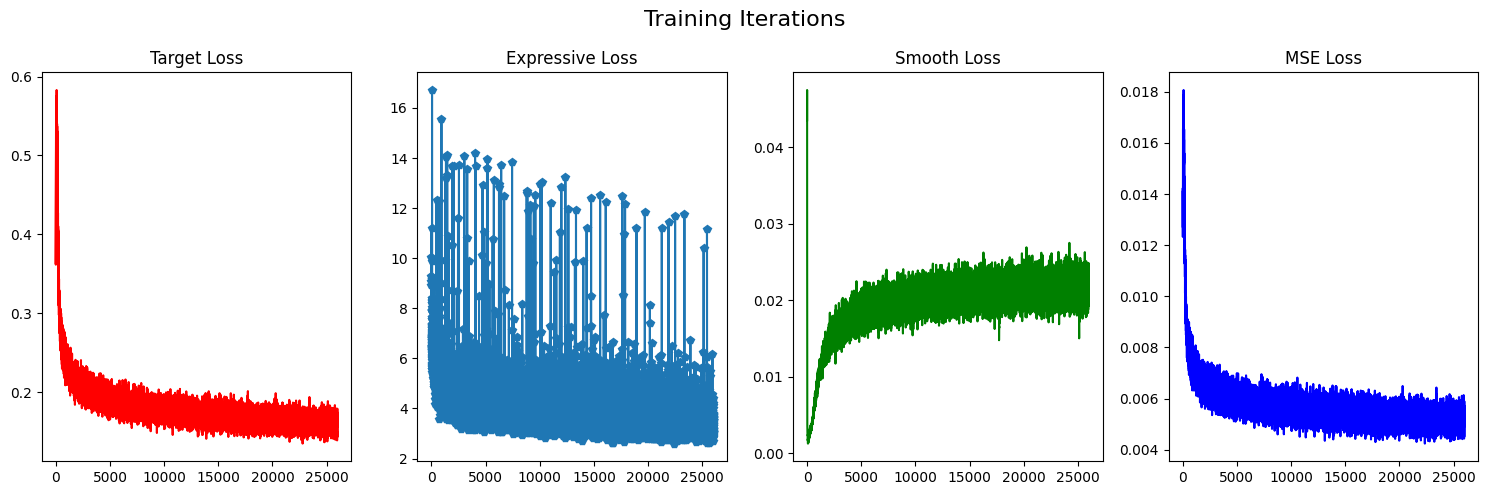

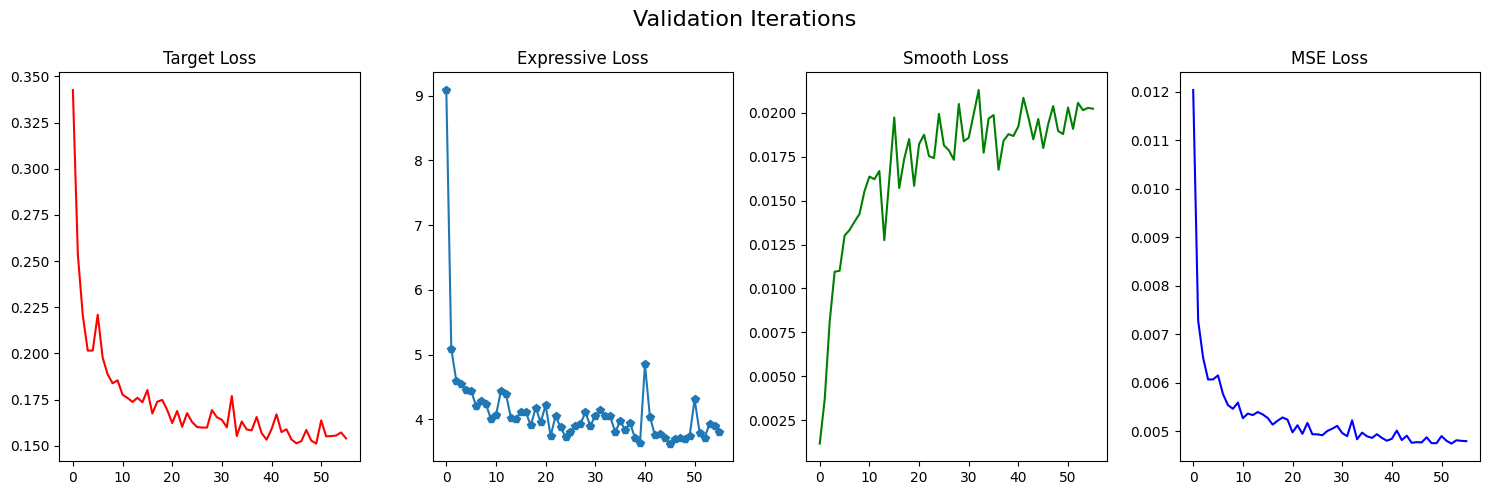

  0%|          | 0/1857 [00:00<?, ?it/s]

[14][0/1857]: [train] [target loss]: 0.1625135987997055 [exp loss]: 3.3472020626068115 [smooth loss]: 0.020500361919403076 [mse]: 0.005492014423868126


  0%|          | 2/1857 [00:02<30:58,  1.00s/it]  

[14][0/1857]: [val] [target loss]: 0.1543329268693924 [exp loss]: 3.788948001861572 [smooth loss]: 0.019791860580444336 [mse]: 0.0047982774643346455


 11%|█         | 202/1857 [00:28<03:34,  7.71it/s]

[14][200/1857]: [train] [target loss]: 0.16397152841091156 [exp loss]: 3.3199656009674072 [smooth loss]: 0.023844003677368164 [mse]: 0.005490570874496403


 22%|██▏       | 402/1857 [00:52<02:49,  8.60it/s]

[14][400/1857]: [train] [target loss]: 0.16672919690608978 [exp loss]: 3.68753719329834 [smooth loss]: 0.02078843116760254 [mse]: 0.005566534160482986


 32%|███▏      | 600/1857 [01:15<02:26,  8.55it/s]

[14][600/1857]: [train] [target loss]: 0.15705837309360504 [exp loss]: 3.6233396530151367 [smooth loss]: 0.023597776889801025 [mse]: 0.005098032071947774


 32%|███▏      | 602/1857 [01:17<10:22,  2.02it/s]

[14][600/1857]: [val] [target loss]: 0.15028030872344972 [exp loss]: 3.693537015914917 [smooth loss]: 0.019214789867401123 [mse]: 0.004728667363550951


 43%|████▎     | 802/1857 [01:41<02:02,  8.60it/s]

[14][800/1857]: [train] [target loss]: 0.16188520193099976 [exp loss]: 3.9896388053894043 [smooth loss]: 0.021540522575378418 [mse]: 0.005099838724839723


 54%|█████▍    | 1002/1857 [02:04<01:39,  8.57it/s]

[14][1000/1857]: [train] [target loss]: 0.16328634321689606 [exp loss]: 3.5366134643554688 [smooth loss]: 0.023900330066680908 [mse]: 0.005298102094215455


 65%|██████▍   | 1200/1857 [02:27<01:17,  8.51it/s]

[14][1200/1857]: [train] [target loss]: 0.16228874027729034 [exp loss]: 3.6171774864196777 [smooth loss]: 0.025104045867919922 [mse]: 0.005231500342633411


 65%|██████▍   | 1202/1857 [02:30<06:00,  1.82it/s]

[14][1200/1857]: [val] [target loss]: 0.15506369829177857 [exp loss]: 3.9158932685852053 [smooth loss]: 0.01866128444671631 [mse]: 0.0049535133193577465


 75%|███████▌  | 1402/1857 [02:53<00:53,  8.49it/s]

[14][1400/1857]: [train] [target loss]: 0.16885028779506683 [exp loss]: 3.7676305770874023 [smooth loss]: 0.02133762836456299 [mse]: 0.005304230209915213


 86%|████████▋ | 1602/1857 [03:17<00:29,  8.51it/s]

[14][1600/1857]: [train] [target loss]: 0.16191570460796356 [exp loss]: 3.3096578121185303 [smooth loss]: 0.023510873317718506 [mse]: 0.005268824915057212


 97%|█████████▋| 1800/1857 [03:40<00:06,  8.52it/s]

[14][1800/1857]: [train] [target loss]: 0.15549902617931366 [exp loss]: 3.414780855178833 [smooth loss]: 0.019729912281036377 [mse]: 0.005050574346436824


 97%|█████████▋| 1802/1857 [03:42<00:27,  1.97it/s]

[14][1800/1857]: [val] [target loss]: 0.15127385437488555 [exp loss]: 3.705889329910278 [smooth loss]: 0.020627365112304688 [mse]: 0.0047856826393921255


100%|██████████| 1857/1857 [03:49<00:00,  8.11it/s]


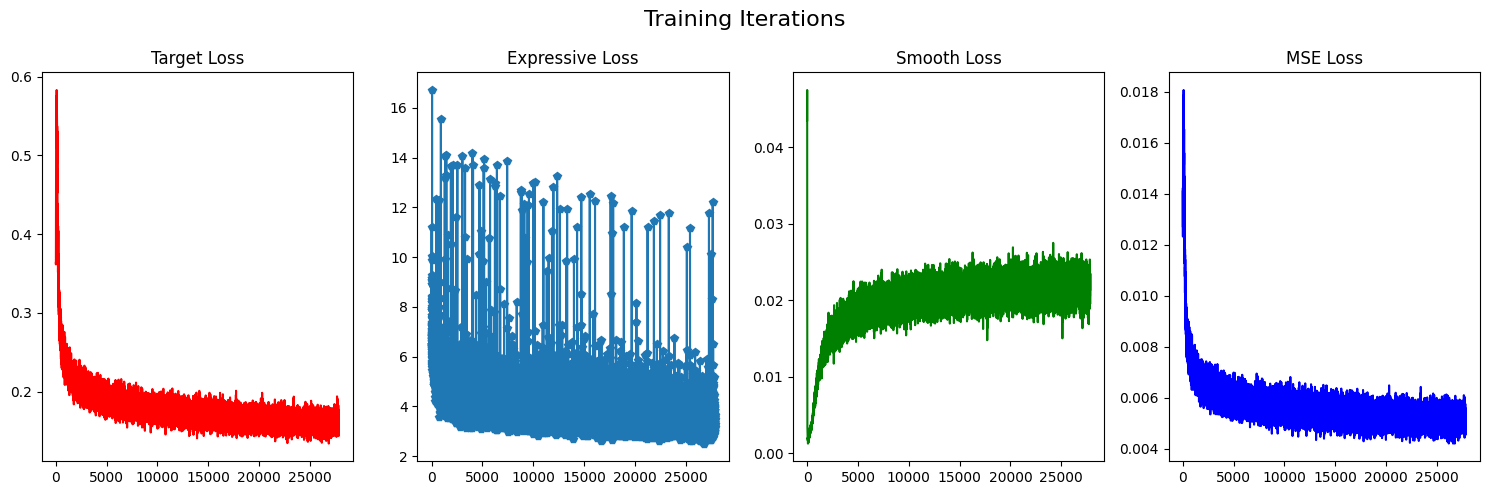

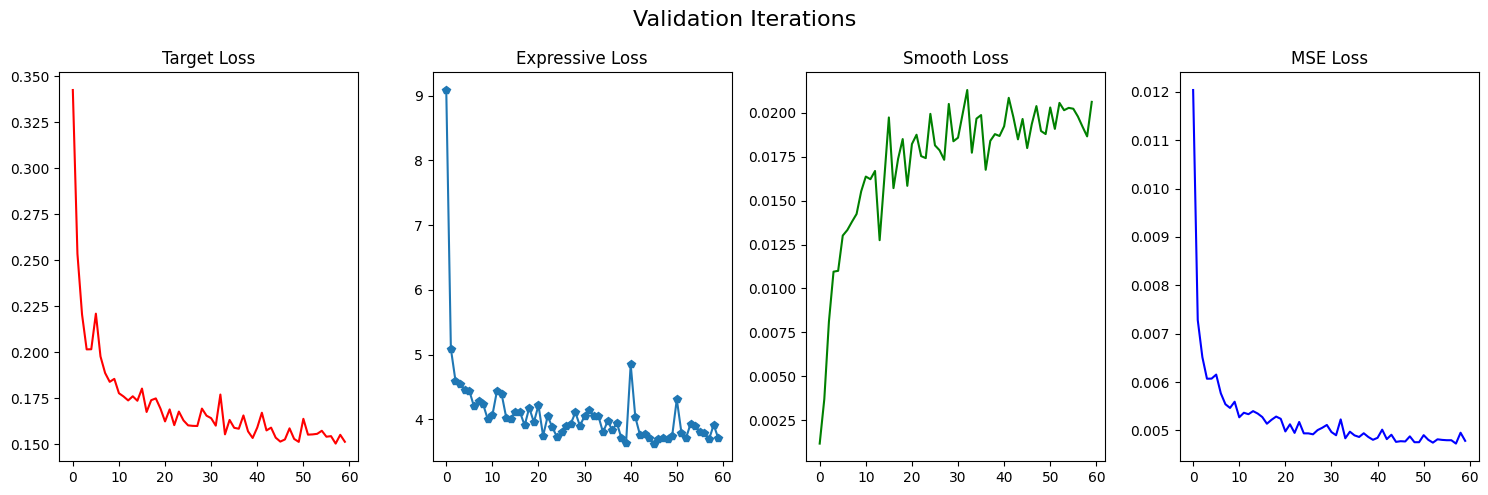

  0%|          | 0/1857 [00:00<?, ?it/s]

[15][0/1857]: [train] [target loss]: 0.1510096937417984 [exp loss]: 2.8329031467437744 [smooth loss]: 0.02074533700942993 [mse]: 0.004874852168558012


  0%|          | 2/1857 [00:02<26:48,  1.15it/s]

[15][0/1857]: [val] [target loss]: 0.15678593397140503 [exp loss]: 3.8673904514312745 [smooth loss]: 0.01918326139450073 [mse]: 0.004895938513554601


 11%|█         | 202/1857 [00:25<03:13,  8.57it/s]

[15][200/1857]: [train] [target loss]: 0.15881836414337158 [exp loss]: 3.051898241043091 [smooth loss]: 0.021822333335876465 [mse]: 0.005141661753228445


 22%|██▏       | 402/1857 [00:48<02:49,  8.58it/s]

[15][400/1857]: [train] [target loss]: 0.15586449205875397 [exp loss]: 3.416332483291626 [smooth loss]: 0.020716428756713867 [mse]: 0.0051536590944724564


 32%|███▏      | 600/1857 [01:12<02:26,  8.57it/s]

[15][600/1857]: [train] [target loss]: 0.14883500337600708 [exp loss]: 3.3275070190429688 [smooth loss]: 0.02004075050354004 [mse]: 0.004817609909507688


 32%|███▏      | 602/1857 [01:14<10:38,  1.97it/s]

[15][600/1857]: [val] [target loss]: 0.1531006848812103 [exp loss]: 3.7257951164245604 [smooth loss]: 0.020908241271972657 [mse]: 0.004722025342170194


 43%|████▎     | 802/1857 [01:37<02:03,  8.54it/s]

[15][800/1857]: [train] [target loss]: 0.15586192905902863 [exp loss]: 3.355090618133545 [smooth loss]: 0.023831188678741455 [mse]: 0.0047648311002500545


 54%|█████▍    | 1002/1857 [02:01<01:40,  8.53it/s]

[15][1000/1857]: [train] [target loss]: 0.15360073745250702 [exp loss]: 3.373281717300415 [smooth loss]: 0.022762179374694824 [mse]: 0.005042591120955515


 65%|██████▍   | 1200/1857 [02:24<01:16,  8.57it/s]

[15][1200/1857]: [train] [target loss]: 0.15382328629493713 [exp loss]: 3.309563159942627 [smooth loss]: 0.0222131609916687 [mse]: 0.004757967952972341


 65%|██████▍   | 1202/1857 [02:26<05:30,  1.98it/s]

[15][1200/1857]: [val] [target loss]: 0.154354287981987 [exp loss]: 3.669397611618042 [smooth loss]: 0.01958719253540039 [mse]: 0.004727599171898146


 75%|███████▌  | 1402/1857 [02:50<00:53,  8.46it/s]

[15][1400/1857]: [train] [target loss]: 0.15522563457489014 [exp loss]: 3.47699236869812 [smooth loss]: 0.02323770523071289 [mse]: 0.004810054483875972


 86%|████████▋ | 1602/1857 [03:14<00:30,  8.44it/s]

[15][1600/1857]: [train] [target loss]: 0.1567779928445816 [exp loss]: 3.07375168800354 [smooth loss]: 0.024746596813201904 [mse]: 0.005217654215449094


 97%|█████████▋| 1800/1857 [03:37<00:06,  8.49it/s]

[15][1800/1857]: [train] [target loss]: 0.15088845789432526 [exp loss]: 3.8171253204345703 [smooth loss]: 0.020540475845336914 [mse]: 0.004863813067255684


 97%|█████████▋| 1802/1857 [03:39<00:27,  1.99it/s]

[15][1800/1857]: [val] [target loss]: 0.14847895741462708 [exp loss]: 3.723499879837036 [smooth loss]: 0.019734909534454347 [mse]: 0.004670095078131083


100%|██████████| 1857/1857 [03:46<00:00,  8.22it/s]


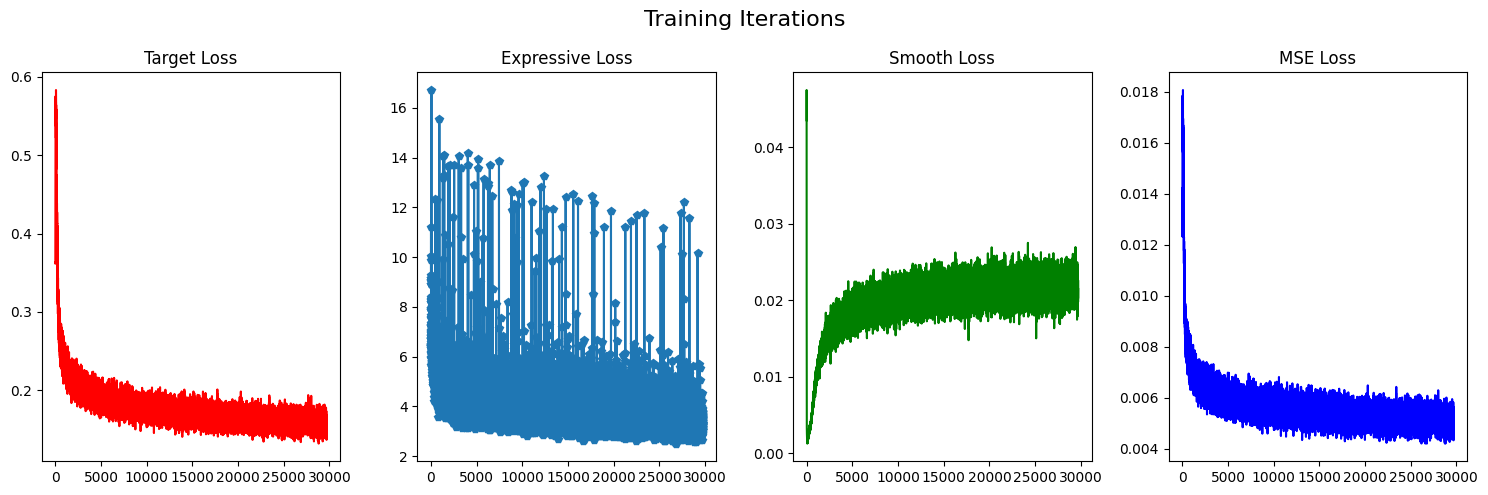

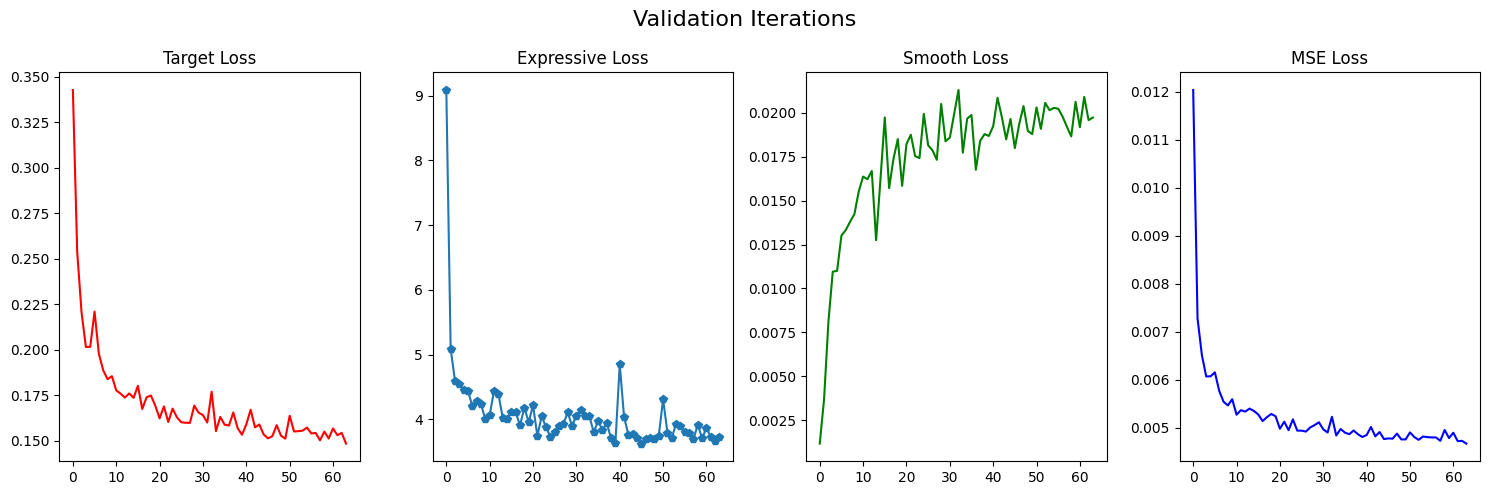

  0%|          | 0/1857 [00:00<?, ?it/s]

[16][0/1857]: [train] [target loss]: 0.1496322900056839 [exp loss]: 3.0756194591522217 [smooth loss]: 0.022877275943756104 [mse]: 0.004813445542966656


  0%|          | 2/1857 [00:02<26:43,  1.16it/s]

[16][0/1857]: [val] [target loss]: 0.15410978972911835 [exp loss]: 3.715155076980591 [smooth loss]: 0.019039688110351564 [mse]: 0.004806927674203328


 11%|█         | 202/1857 [00:25<03:13,  8.57it/s]

[16][200/1857]: [train] [target loss]: 0.16558080911636353 [exp loss]: 3.036905527114868 [smooth loss]: 0.02171623706817627 [mse]: 0.005401432726244719


 22%|██▏       | 402/1857 [00:48<02:51,  8.49it/s]

[16][400/1857]: [train] [target loss]: 0.14861299097537994 [exp loss]: 3.103391408920288 [smooth loss]: 0.021848618984222412 [mse]: 0.004838786635869832


 32%|███▏      | 600/1857 [01:12<02:26,  8.59it/s]

[16][600/1857]: [train] [target loss]: 0.15721191465854645 [exp loss]: 3.5369443893432617 [smooth loss]: 0.023427069187164307 [mse]: 0.005092712170946125


 32%|███▏      | 602/1857 [01:14<10:41,  1.96it/s]

[16][600/1857]: [val] [target loss]: 0.1561778235435486 [exp loss]: 4.626408433914184 [smooth loss]: 0.019595437049865723 [mse]: 0.004874079626111599


 43%|████▎     | 802/1857 [01:37<02:03,  8.56it/s]

[16][800/1857]: [train] [target loss]: 0.16548652946949005 [exp loss]: 3.30739688873291 [smooth loss]: 0.025661766529083252 [mse]: 0.005138859346614808


 54%|█████▍    | 1002/1857 [02:01<01:39,  8.58it/s]

[16][1000/1857]: [train] [target loss]: 0.14964158833026886 [exp loss]: 3.1035449504852295 [smooth loss]: 0.022755563259124756 [mse]: 0.004794936219926464


 65%|██████▍   | 1200/1857 [02:24<01:16,  8.54it/s]

[16][1200/1857]: [train] [target loss]: 0.14315107464790344 [exp loss]: 2.7007100582122803 [smooth loss]: 0.020115435123443604 [mse]: 0.00481728699155353


 65%|██████▍   | 1202/1857 [02:26<05:18,  2.06it/s]

[16][1200/1857]: [val] [target loss]: 0.15226478695869447 [exp loss]: 3.7566651630401613 [smooth loss]: 0.01919081687927246 [mse]: 0.004776857717846396


 75%|███████▌  | 1402/1857 [02:49<00:53,  8.49it/s]

[16][1400/1857]: [train] [target loss]: 0.15757478773593903 [exp loss]: 3.538499355316162 [smooth loss]: 0.023141443729400635 [mse]: 0.0050588044162592685


 86%|████████▋ | 1602/1857 [03:13<00:30,  8.50it/s]

[16][1600/1857]: [train] [target loss]: 0.15384401381015778 [exp loss]: 3.026556968688965 [smooth loss]: 0.021440207958221436 [mse]: 0.005092076114063279


 97%|█████████▋| 1800/1857 [03:36<00:06,  8.56it/s]

[16][1800/1857]: [train] [target loss]: 0.15347331762313843 [exp loss]: 3.024958848953247 [smooth loss]: 0.021955490112304688 [mse]: 0.0048378334262960815


 97%|█████████▋| 1802/1857 [03:38<00:26,  2.10it/s]

[16][1800/1857]: [val] [target loss]: 0.15097982466220855 [exp loss]: 3.8137592601776125 [smooth loss]: 0.01979809522628784 [mse]: 0.004683301314139135


100%|██████████| 1857/1857 [03:44<00:00,  8.26it/s]


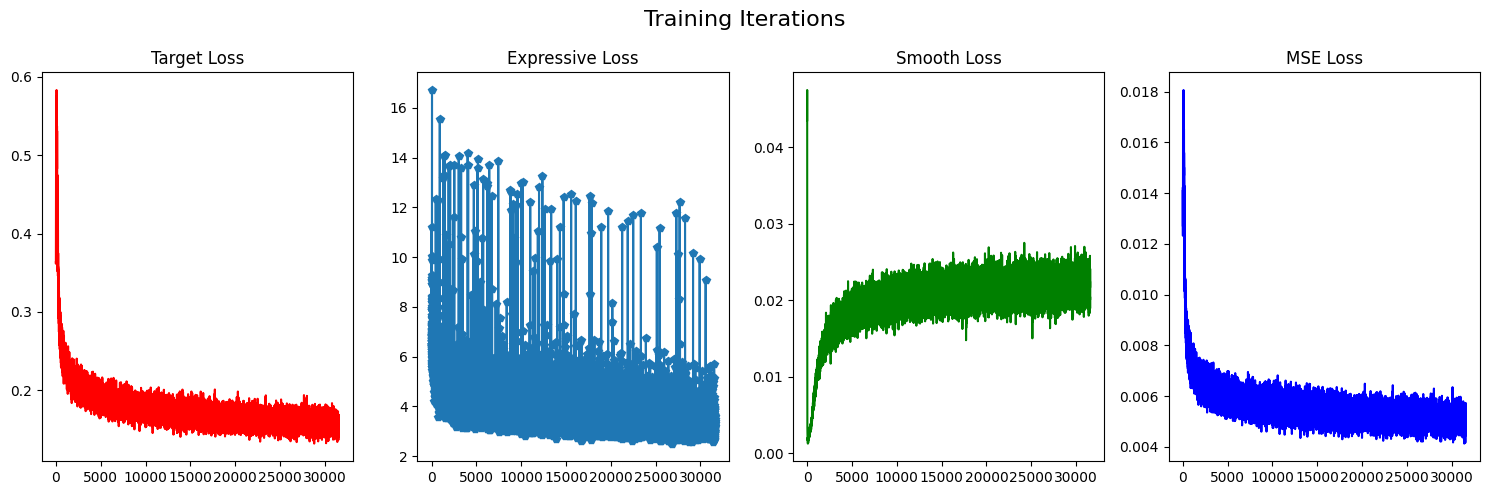

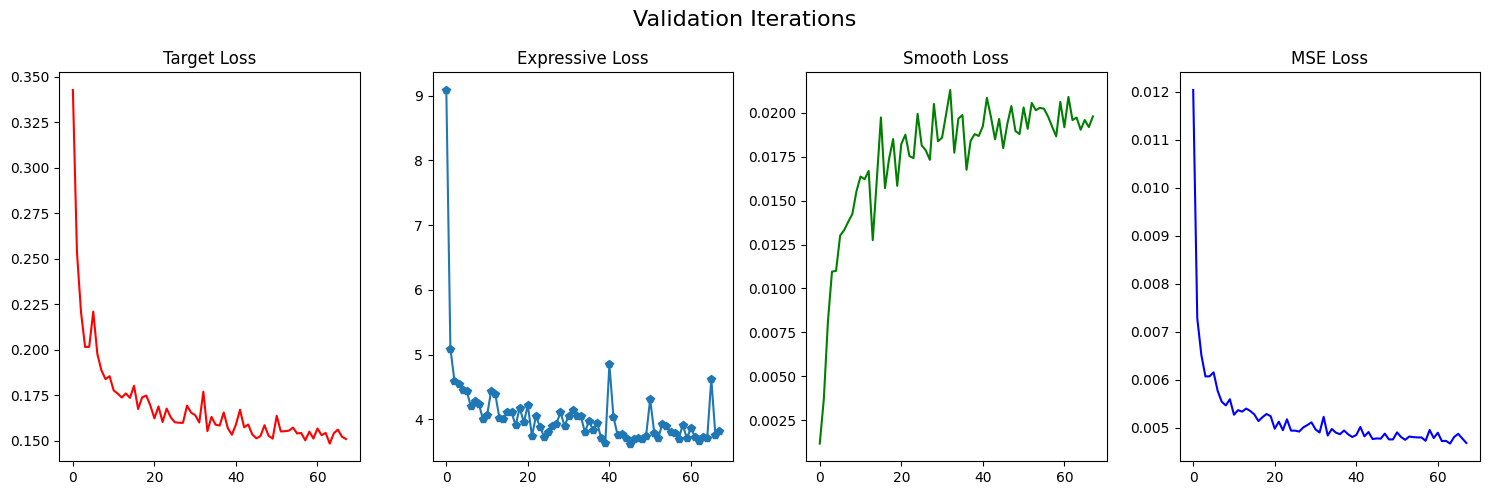

  0%|          | 0/1857 [00:00<?, ?it/s]

[17][0/1857]: [train] [target loss]: 0.16379477083683014 [exp loss]: 3.421701669692993 [smooth loss]: 0.022136330604553223 [mse]: 0.0051760995640279485


  0%|          | 2/1857 [00:01<25:27,  1.21it/s]

[17][0/1857]: [val] [target loss]: 0.15161183893680572 [exp loss]: 3.716146459579468 [smooth loss]: 0.020615649223327637 [mse]: 0.004731422211384797


 11%|█         | 202/1857 [00:25<03:10,  8.69it/s]

[17][200/1857]: [train] [target loss]: 0.13810542225837708 [exp loss]: 2.8796889781951904 [smooth loss]: 0.022322416305541992 [mse]: 0.004394317991383102


 22%|██▏       | 402/1857 [00:48<02:48,  8.66it/s]

[17][400/1857]: [train] [target loss]: 0.15794919431209564 [exp loss]: 3.371518850326538 [smooth loss]: 0.020815014839172363 [mse]: 0.0051899865918352646


 32%|███▏      | 600/1857 [01:11<02:48,  7.48it/s]

[17][600/1857]: [train] [target loss]: 0.15935735404491425 [exp loss]: 3.633535623550415 [smooth loss]: 0.021777987480163574 [mse]: 0.0053253562628801186


 32%|███▏      | 602/1857 [01:13<09:49,  2.13it/s]

[17][600/1857]: [val] [target loss]: 0.14969118297100067 [exp loss]: 3.8544303035736083 [smooth loss]: 0.019249184131622313 [mse]: 0.00469321899412038


 43%|████▎     | 802/1857 [01:36<02:05,  8.43it/s]

[17][800/1857]: [train] [target loss]: 0.15497036278247833 [exp loss]: 3.040926933288574 [smooth loss]: 0.022312819957733154 [mse]: 0.005197722851751012


 54%|█████▍    | 1002/1857 [01:59<01:39,  8.63it/s]

[17][1000/1857]: [train] [target loss]: 0.14998844265937805 [exp loss]: 3.362529993057251 [smooth loss]: 0.020695626735687256 [mse]: 0.004843534734823083


 65%|██████▍   | 1200/1857 [02:22<01:15,  8.70it/s]

[17][1200/1857]: [train] [target loss]: 0.14564797282218933 [exp loss]: 2.8886239528656006 [smooth loss]: 0.021155595779418945 [mse]: 0.00464821145840841


 65%|██████▍   | 1202/1857 [02:24<04:55,  2.21it/s]

[17][1200/1857]: [val] [target loss]: 0.15060962617397308 [exp loss]: 3.889557342529297 [smooth loss]: 0.020378072261810303 [mse]: 0.0047310404140645315


 75%|███████▌  | 1402/1857 [02:47<00:52,  8.66it/s]

[17][1400/1857]: [train] [target loss]: 0.17796862125396729 [exp loss]: 4.94146728515625 [smooth loss]: 0.02182561159133911 [mse]: 0.005710887447977454


 86%|████████▋ | 1602/1857 [03:10<00:29,  8.64it/s]

[17][1600/1857]: [train] [target loss]: 0.14614619314670563 [exp loss]: 3.056668519973755 [smooth loss]: 0.020636558532714844 [mse]: 0.004597704273587416


 97%|█████████▋| 1800/1857 [03:33<00:06,  8.64it/s]

[17][1800/1857]: [train] [target loss]: 0.14990276098251343 [exp loss]: 3.030428171157837 [smooth loss]: 0.022246122360229492 [mse]: 0.004900354517732094


 97%|█████████▋| 1802/1857 [03:35<00:24,  2.20it/s]

[17][1800/1857]: [val] [target loss]: 0.1486292588710785 [exp loss]: 3.762856111526489 [smooth loss]: 0.02081512451171875 [mse]: 0.0046395622075832395


100%|██████████| 1857/1857 [03:42<00:00,  8.36it/s]


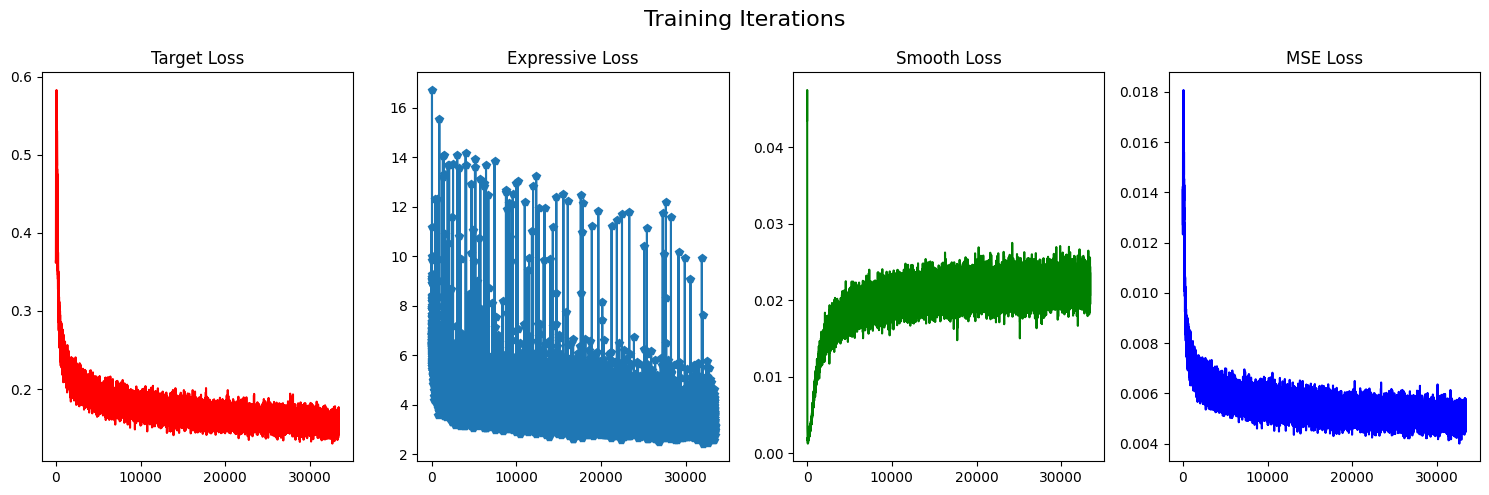

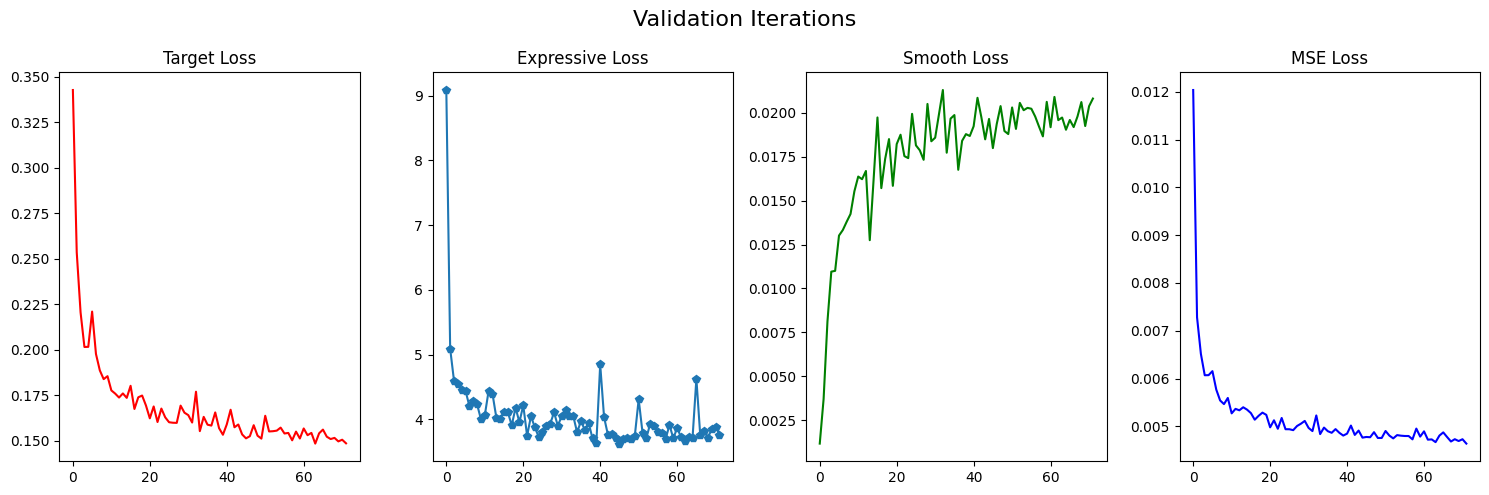

  0%|          | 0/1857 [00:00<?, ?it/s]

[18][0/1857]: [train] [target loss]: 0.15309882164001465 [exp loss]: 2.7420191764831543 [smooth loss]: 0.0217740535736084 [mse]: 0.004942997618374265


  0%|          | 2/1857 [00:01<25:44,  1.20it/s]

[18][0/1857]: [val] [target loss]: 0.15099680721759795 [exp loss]: 3.57073956489563 [smooth loss]: 0.01981186628341675 [mse]: 0.004734429022938146


 11%|█         | 202/1857 [00:28<03:41,  7.47it/s]

[18][200/1857]: [train] [target loss]: 0.15483830869197845 [exp loss]: 3.105067491531372 [smooth loss]: 0.019761621952056885 [mse]: 0.00511452441172091


 22%|██▏       | 402/1857 [00:55<03:14,  7.48it/s]

[18][400/1857]: [train] [target loss]: 0.15081787109375 [exp loss]: 2.9764139652252197 [smooth loss]: 0.023206055164337158 [mse]: 0.004788595390422377


 32%|███▏      | 600/1857 [01:21<02:42,  7.72it/s]

[18][600/1857]: [train] [target loss]: 0.15377448499202728 [exp loss]: 3.7913737297058105 [smooth loss]: 0.02047288417816162 [mse]: 0.005053817197290077


 32%|███▏      | 602/1857 [01:23<10:23,  2.01it/s]

[18][600/1857]: [val] [target loss]: 0.15040230214595796 [exp loss]: 3.828822679519653 [smooth loss]: 0.020932581424713135 [mse]: 0.004689213456528224


 43%|████▎     | 802/1857 [01:49<02:17,  7.65it/s]

[18][800/1857]: [train] [target loss]: 0.15286771953105927 [exp loss]: 3.3960790634155273 [smooth loss]: 0.021687567234039307 [mse]: 0.004903671336982638


 54%|█████▍    | 1002/1857 [02:16<01:52,  7.58it/s]

[18][1000/1857]: [train] [target loss]: 0.15165957808494568 [exp loss]: 3.4289956092834473 [smooth loss]: 0.02232956886291504 [mse]: 0.004712347657071063


 65%|██████▍   | 1200/1857 [02:42<01:26,  7.58it/s]

[18][1200/1857]: [train] [target loss]: 0.1588335633277893 [exp loss]: 3.53584885597229 [smooth loss]: 0.020726025104522705 [mse]: 0.005068347075438484


 65%|██████▍   | 1202/1857 [02:44<05:07,  2.13it/s]

[18][1200/1857]: [val] [target loss]: 0.15378645896911622 [exp loss]: 3.6611858367919923 [smooth loss]: 0.02023550510406494 [mse]: 0.004771988106263058


 75%|███████▌  | 1402/1857 [03:10<00:59,  7.69it/s]

[18][1400/1857]: [train] [target loss]: 0.13867759704589844 [exp loss]: 2.8068008422851562 [smooth loss]: 0.019518733024597168 [mse]: 0.004388737897916843


 86%|████████▋ | 1602/1857 [03:37<00:33,  7.52it/s]

[18][1600/1857]: [train] [target loss]: 0.16530616581439972 [exp loss]: 3.993901014328003 [smooth loss]: 0.021271884441375732 [mse]: 0.0052910500845970605


 97%|█████████▋| 1800/1857 [04:03<00:07,  7.55it/s]

[18][1800/1857]: [train] [target loss]: 0.1521957963705063 [exp loss]: 2.9618215560913086 [smooth loss]: 0.019885897636413574 [mse]: 0.005123669036316573


 97%|█████████▋| 1802/1857 [04:05<00:27,  2.03it/s]

[18][1800/1857]: [val] [target loss]: 0.15172709465026857 [exp loss]: 4.056126642227173 [smooth loss]: 0.018376355171203614 [mse]: 0.00480635255376268


100%|██████████| 1857/1857 [04:12<00:00,  7.35it/s]


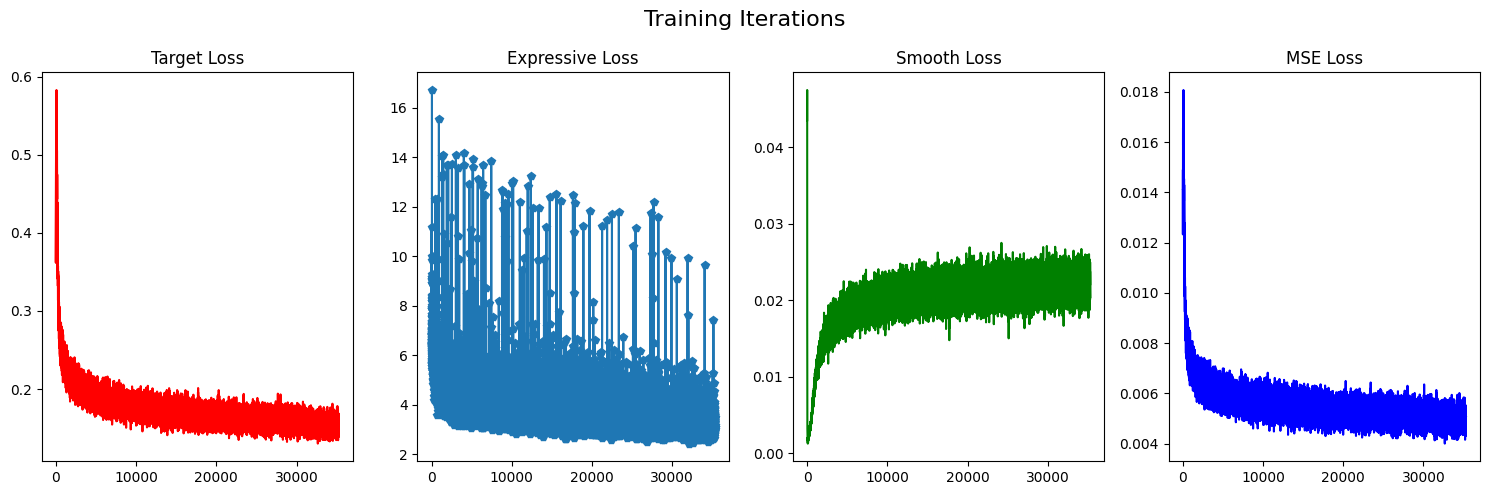

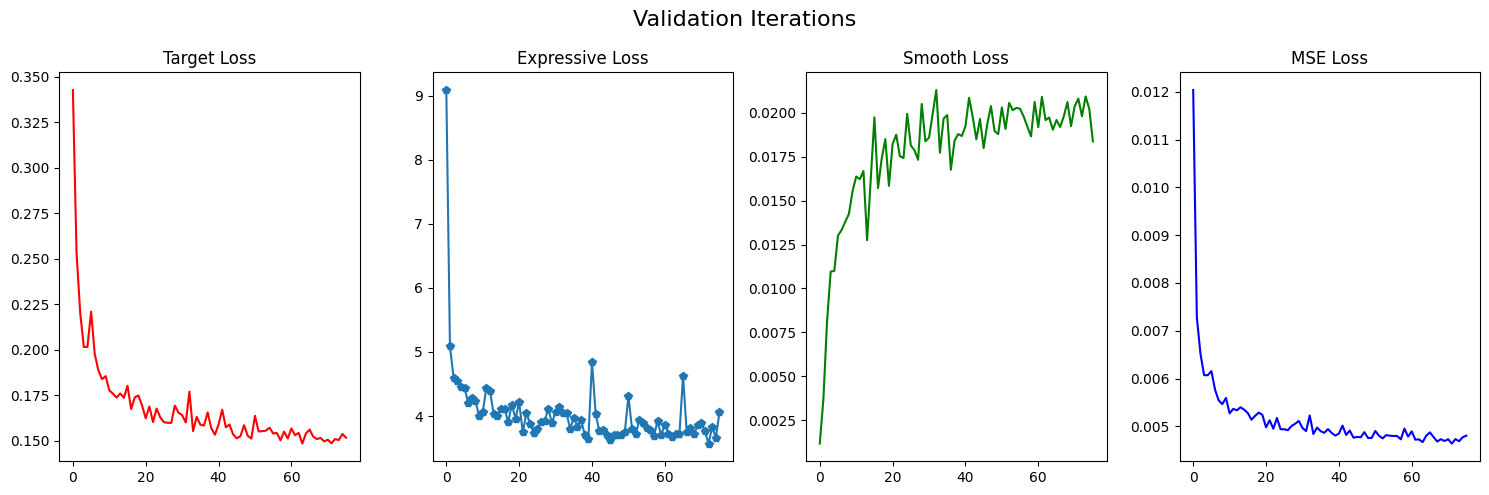

  0%|          | 0/1857 [00:00<?, ?it/s]

[19][0/1857]: [train] [target loss]: 0.1530357450246811 [exp loss]: 3.134310007095337 [smooth loss]: 0.020670294761657715 [mse]: 0.004961451310953807


  0%|          | 2/1857 [00:01<25:24,  1.22it/s]

[19][0/1857]: [val] [target loss]: 0.14862687706947328 [exp loss]: 3.7811766242980958 [smooth loss]: 0.019336543083190917 [mse]: 0.004671494078784972


 11%|█         | 202/1857 [00:28<03:37,  7.62it/s]

[19][200/1857]: [train] [target loss]: 0.14699995517730713 [exp loss]: 2.736194133758545 [smooth loss]: 0.022004783153533936 [mse]: 0.004697666816912014


 22%|██▏       | 402/1857 [00:54<03:14,  7.48it/s]

[19][400/1857]: [train] [target loss]: 0.1482294648885727 [exp loss]: 2.9514684677124023 [smooth loss]: 0.019592702388763428 [mse]: 0.004863427150537118


 32%|███▏      | 600/1857 [01:21<02:50,  7.38it/s]

[19][600/1857]: [train] [target loss]: 0.14949727058410645 [exp loss]: 3.248506784439087 [smooth loss]: 0.023792803287506104 [mse]: 0.005127767440060865


 32%|███▏      | 602/1857 [01:23<10:42,  1.95it/s]

[19][600/1857]: [val] [target loss]: 0.15226951479911804 [exp loss]: 4.071766185760498 [smooth loss]: 0.021143414974212647 [mse]: 0.004860304619751336


 43%|████▎     | 802/1857 [01:50<02:19,  7.57it/s]

[19][800/1857]: [train] [target loss]: 0.14935708045959473 [exp loss]: 3.117471933364868 [smooth loss]: 0.021393954753875732 [mse]: 0.004709394781061655


 54%|█████▍    | 1002/1857 [02:16<01:53,  7.51it/s]

[19][1000/1857]: [train] [target loss]: 0.14270451664924622 [exp loss]: 2.892120838165283 [smooth loss]: 0.02260446548461914 [mse]: 0.004649286319172289


 65%|██████▍   | 1200/1857 [02:43<01:28,  7.45it/s]

[19][1200/1857]: [train] [target loss]: 0.15710687637329102 [exp loss]: 3.2643332481384277 [smooth loss]: 0.02295684814453125 [mse]: 0.005188352243979762


 65%|██████▍   | 1202/1857 [02:44<05:05,  2.15it/s]

[19][1200/1857]: [val] [target loss]: 0.15116331338882447 [exp loss]: 3.851705455780029 [smooth loss]: 0.020323042869567872 [mse]: 0.004783304516329931


 75%|███████▌  | 1402/1857 [03:11<01:00,  7.56it/s]

[19][1400/1857]: [train] [target loss]: 0.14550383388996124 [exp loss]: 3.079768419265747 [smooth loss]: 0.019243717193603516 [mse]: 0.004809804662967322


 86%|████████▋ | 1602/1857 [03:38<00:34,  7.37it/s]

[19][1600/1857]: [train] [target loss]: 0.15576939284801483 [exp loss]: 3.763692617416382 [smooth loss]: 0.01852196455001831 [mse]: 0.0050634170910679845


 97%|█████████▋| 1800/1857 [04:04<00:07,  7.38it/s]

[19][1800/1857]: [train] [target loss]: 0.16512921452522278 [exp loss]: 4.001696586608887 [smooth loss]: 0.020324766635894775 [mse]: 0.005103714047167381


 97%|█████████▋| 1802/1857 [04:06<00:26,  2.07it/s]

[19][1800/1857]: [val] [target loss]: 0.15344023883342742 [exp loss]: 3.7366159629821776 [smooth loss]: 0.019246299266815186 [mse]: 0.004817043371517154


100%|██████████| 1857/1857 [04:13<00:00,  7.31it/s]


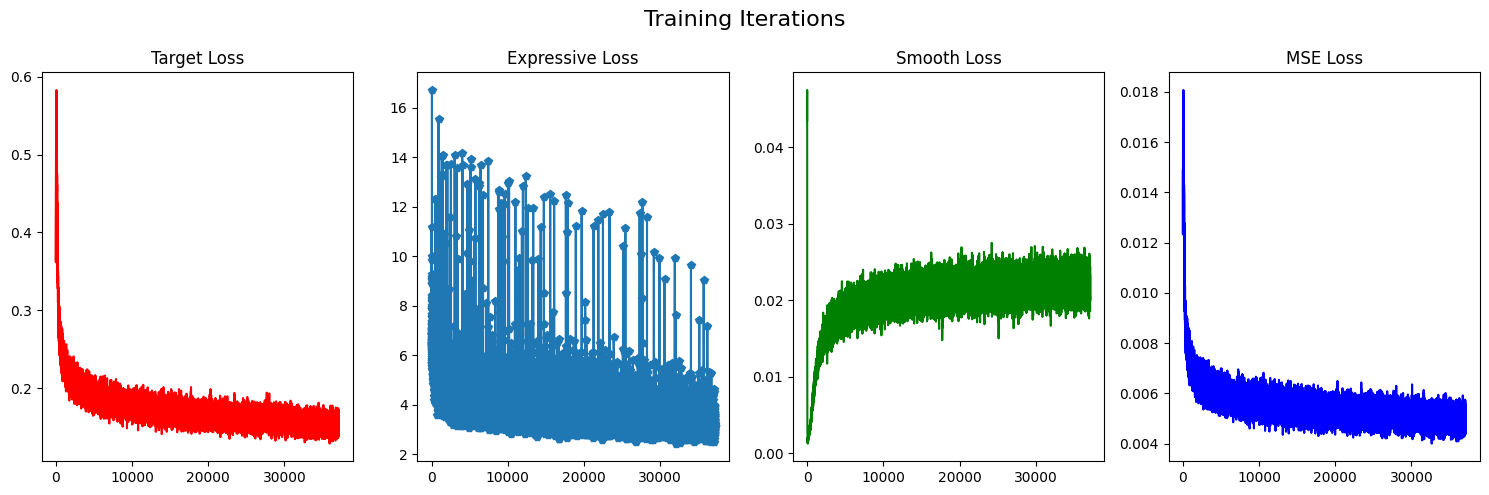

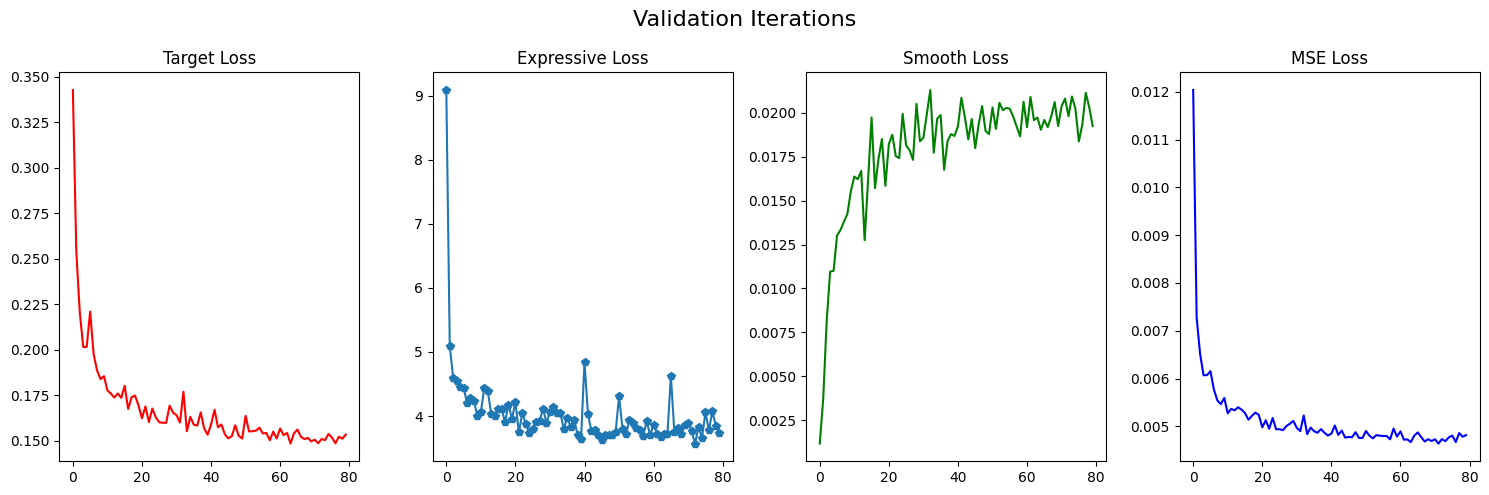

In [19]:
from tqdm import tqdm
num_epochs = 20
log_period = 200
val_period = 600
val_size = 25
target_loss_function = torch.nn.HuberLoss()
smooth_loss_function = torch.nn.CosineSimilarity(dim=2)
mse_loss_function = torch.nn.MSELoss()
target_weight = 1.5
expressive_weight = 0.5
smooth_weight = 0.5

for epoch in range(num_epochs):
    for it, data in enumerate(tqdm(train_loader)):
        net.train()
        in_audio = data['audio']
        facial = data['facial']

        in_audio = in_audio.cuda()
        facial = facial.cuda()
        pre_frames = 4
        in_pre_face = facial.new_zeros((facial.shape[0], facial.shape[1], facial.shape[2] + 1)).cuda()
        in_pre_face[:, 0:pre_frames, :-1] = facial[:, 0:pre_frames]
        in_pre_face[:, 0:pre_frames, -1] = 1 
        
        optimizer.zero_grad()
        out_face = net(in_pre_face,in_audio)
        target_loss = target_loss_function(out_face, facial)
        expressive_loss = expressive_loss_function(out_face, facial)
        smooth_loss = 1 - smooth_loss_function(out_face[:,:-1,:], out_face[:,1:,:]).mean()
        loss = target_weight * target_loss + expressive_weight * expressive_loss + smooth_weight * smooth_loss
        loss.backward()
        optimizer.step()
        
        train_target_loss.append(target_loss.item())
        train_expressive_loss.append(expressive_loss.item())
        train_smooth_loss.append(smooth_loss.item())
        train_mse_loss.append(mse_loss_function(out_face.cpu()*std_facial+mean_facial, facial.cpu()*std_facial+mean_facial).item())
        
        #logging
        if it % log_period == 0:
            print(f'[{epoch}][{it}/{len(train_loader)}]: [train] [target loss]: {train_target_loss[-1]} [exp loss]: {train_expressive_loss[-1]} [smooth loss]: {train_smooth_loss[-1]} [mse]: {train_mse_loss[-1]}')
        
        if it % val_period == 0:
            net.eval()
            val_target_loss_st = []
            val_expressive_loss_st = []
            val_smooth_loss_st = []
            val_mse_loss_st = []
            val_cnt = 0
            
            for _, data in enumerate(val_loader):
                in_audio = data['audio']
                facial = data['facial']
                in_audio = in_audio.cuda()
                facial = facial.cuda()
                pre_frames = 4
                in_pre_face = facial.new_zeros((facial.shape[0], facial.shape[1], facial.shape[2] + 1)).cuda()
                in_pre_face[:, 0:pre_frames, :-1] = facial[:, 0:pre_frames]
                in_pre_face[:, 0:pre_frames, -1] = 1 

                out_face = net(in_pre_face,in_audio)
                target_loss = target_loss_function(out_face, facial) 
                expressive_loss = expressive_loss_function(out_face, facial)
                smooth_loss = 1 - smooth_loss_function(out_face[:,:-1,:], out_face[:,1:,:]).mean()

                val_target_loss_st.append(target_loss.item())
                val_expressive_loss_st.append(expressive_loss.item())
                val_smooth_loss_st.append(smooth_loss.item())
                val_mse_loss_st.append(mse_loss_function(out_face.cpu()*std_facial+mean_facial, facial.cpu()*std_facial+mean_facial).item())
                
                
                val_cnt += 1
                if val_cnt >= val_size:
                    break
            
            val_target_loss.append(np.average(val_target_loss_st))
            val_expressive_loss.append(np.average(val_expressive_loss_st))
            val_smooth_loss.append(np.average(val_smooth_loss_st))
            val_mse_loss.append(np.average(val_mse_loss_st))
            print(f'[{epoch}][{it}/{len(train_loader)}]: [val] [target loss]: {val_target_loss[-1]} [exp loss]: {val_expressive_loss[-1]} [smooth loss]: {val_smooth_loss[-1]} [mse]: {val_mse_loss[-1]}')
    plot_train_val_loss()
        

In [20]:
torch.save(net.state_dict(), 'ckpt_model/simplenet3.pth')

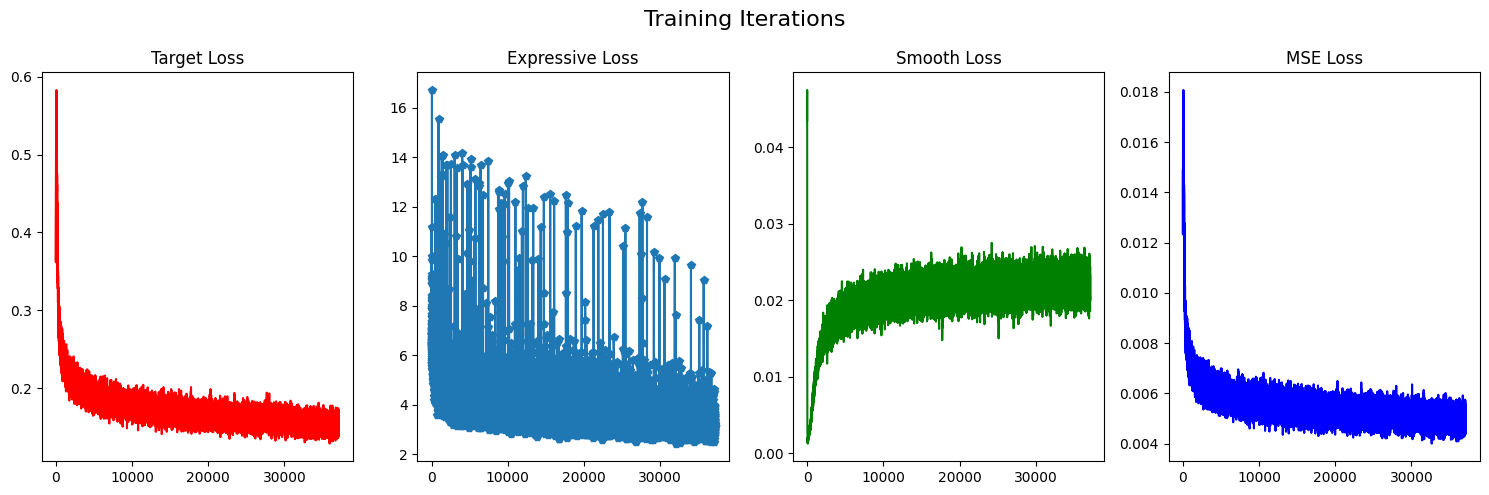

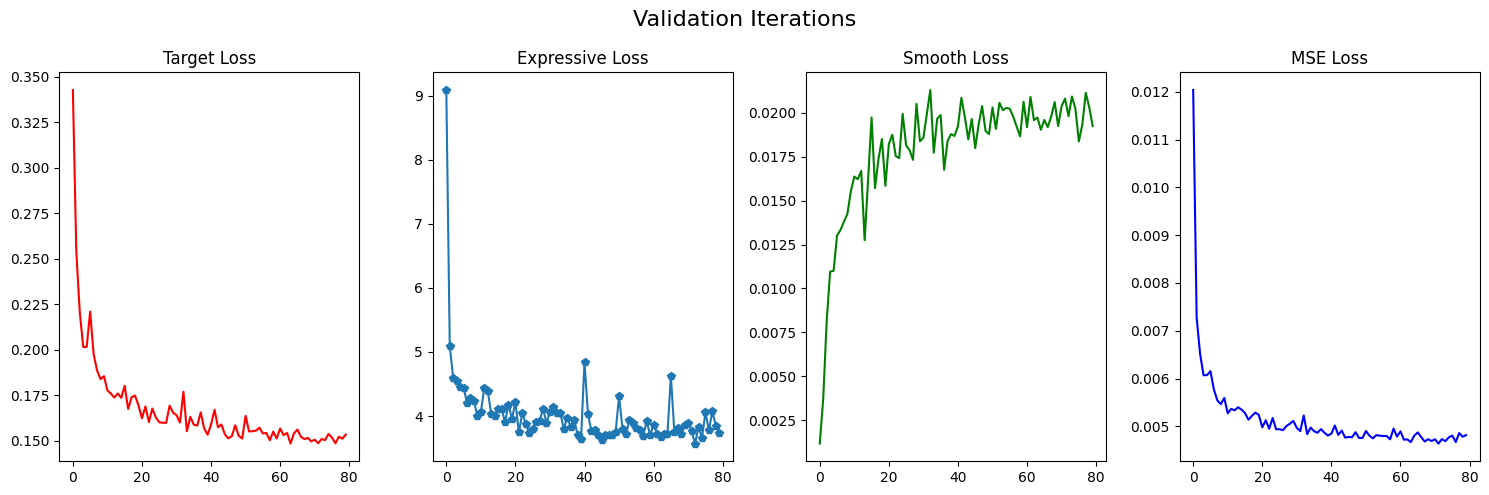

In [21]:
plot_train_val_loss()

### Testing

In [1]:
from pythonosc import udp_client
import time
import sounddevice as sd
import torch
from dataloaders.beat import CustomDataset
from dataloaders.build_vocab import Vocab
import pickle
import numpy as np

config_file = open("camn_config.obj", 'rb') 
args = pickle.load(config_file)
args.batch_size = 16

mean_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_mean.npy"))
std_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_std.npy"))
mean_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_mean.npy"))
std_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_std.npy"))

In [13]:
test_data = CustomDataset(args, "test")
test_loader = torch.utils.data.DataLoader(
    test_data, 
    batch_size=1,  
    shuffle=True,  
    drop_last=False,
)

In [14]:
data = next(iter(test_loader))

In [15]:
facial = data["facial"]
audio = data["audio"]

In [16]:
out_facial = facial * std_facial + mean_facial
out_audio = audio * std_audio + mean_audio

In [17]:
# Try playing the audio, which is at 16KHZ
print(out_facial.min(), out_facial.max())
print(out_facial.std(), out_facial.mean())

tensor(-2.9796e-09, dtype=torch.float64) tensor(0.6390, dtype=torch.float64)
tensor(0.1029, dtype=torch.float64) tensor(0.1012, dtype=torch.float64)


In [18]:
out_audio.shape

torch.Size([1, 480000])

In [19]:
blend =  [
        "browDownLeft",
        "browDownRight",
        "browInnerUp",
        "browOuterUpLeft",
        "browOuterUpRight",
        "cheekPuff",
        "cheekSquintLeft",
        "cheekSquintRight",
        "eyeBlinkLeft",
        "eyeBlinkRight",
        "eyeLookDownLeft",
        "eyeLookDownRight",
        "eyeLookInLeft",
        "eyeLookInRight",
        "eyeLookOutLeft",
        "eyeLookOutRight",
        "eyeLookUpLeft",
        "eyeLookUpRight",
        "eyeSquintLeft",
        "eyeSquintRight",
        "eyeWideLeft",
        "eyeWideRight",
        "jawForward",
        "jawLeft",
        "jawOpen",
        "jawRight",
        "mouthClose",
        "mouthDimpleLeft",
        "mouthDimpleRight",
        "mouthFrownLeft",
        "mouthFrownRight",
        "mouthFunnel",
        "mouthLeft",
        "mouthLowerDownLeft",
        "mouthLowerDownRight",
        "mouthPressLeft",
        "mouthPressRight",
        "mouthPucker",
        "mouthRight",
        "mouthRollLower",
        "mouthRollUpper",
        "mouthShrugLower",
        "mouthShrugUpper",
        "mouthSmileLeft",
        "mouthSmileRight",
        "mouthStretchLeft",
        "mouthStretchRight",
        "mouthUpperUpLeft",
        "mouthUpperUpRight",
        "noseSneerLeft",
        "noseSneerRight",
        "tongueOut"
    ]

In [20]:
def play_audio(out_audio, init_time):
    time.sleep(init_time - time.time())
    sd.play(out_audio, 16000)
    sd.wait()
    print("Audio finished:", time.time())

In [21]:

def send_udp(out_face, init_time):
    #outWeight = np.zeros(52)

    ##need to implement get value in
    outWeight = out_face

    outWeight = outWeight * (outWeight >= 0)

    client = udp_client.SimpleUDPClient('127.0.0.1', 5008)
    osc_array = outWeight.tolist()
    
    fps = 15
    time.sleep(init_time - time.time())
    #start_time = time.time()
    for i in range(len(osc_array)):
        #print(out_face[i].shape)
        for j, out in enumerate(osc_array[i]):
            client.send_message('/' + str(blend[j]), out)

        elpased_time = time.time() - init_time
        sleep_time = 1.0/fps * (i+1) - elpased_time
        if sleep_time > 0:
            time.sleep(sleep_time)
        #start_time = time.time()
    print("Facial finished:", time.time())

In [38]:
import threading

init_time = time.time() + 1

limit_sec = 20

udp_thread = threading.Thread(target=send_udp, args=(out_facial[0, 0:limit_sec*15],init_time))
udp_thread.daemon = True  # Set the thread as a daemon to allow it to exit when the main program exits

audio_thread = threading.Thread(target=play_audio, args=(out_audio[0, 0:limit_sec*16000],init_time-0.3))
audio_thread.daemon = True

udp_thread.start()
audio_thread.start()

udp_thread.join()
audio_thread.join()

Audio finished: 1715374193.2566211
Facial finished: 1715374193.3603458


In [25]:
print(len(out_audio[0])/16000, len(out_facial[0])/15)

30.0 30.0


In [39]:
 # load in model
from scripts.SimpleNet import FaceGenerator
model_path = 'ckpt_model/simplenet2.pth'
net = FaceGenerator()
net.load_state_dict(torch.load(model_path))
net = net.cuda().eval()

In [40]:
in_audio = audio.cuda()
in_facial = facial.cuda()
pre_frames = 4
in_pre_facial = in_facial.new_zeros((in_facial.shape[0], in_facial.shape[1], in_facial.shape[2] + 1)).cuda() 
in_pre_facial[:, 0:pre_frames, :-1] = in_facial[:, 0:pre_frames]
in_pre_facial[:, 0:pre_frames, -1] = 1 

pred_facial = net(in_pre_facial,in_audio).cpu().detach()
pred_facial = np.array(pred_facial * std_facial + mean_facial)

In [41]:
print(pred_facial.min(), pred_facial.max())
print(pred_facial.std(), pred_facial.mean())

-0.06063432841268339 0.6682312827563855
0.12321689561900993 0.1063973784324082


In [42]:
import threading

init_time = time.time() + 1

limit_sec = 70

udp_thread = threading.Thread(target=send_udp, args=(pred_facial[0,0:limit_sec*15],init_time))
udp_thread.daemon = True  # Set the thread as a daemon to allow it to exit when the main program exits

audio_thread = threading.Thread(target=play_audio, args=(out_audio[0,0:limit_sec*16000],init_time-0.3))
audio_thread.daemon = True

udp_thread.start()
audio_thread.start()

udp_thread.join()
audio_thread.join()

Audio finished: 1715374230.8640478
Facial finished: 1715374230.9936013


In [58]:
print(expressive_loss_function(torch.from_numpy(pred_facial), out_facial))
print(torch.nn.functional.mse_loss(torch.from_numpy(pred_facial), out_facial))

tensor(0.0673, dtype=torch.float64)
tensor(0.0052, dtype=torch.float64)


In [19]:
print(pred_facial.shape)
print(out_facial.shape)

(1, 1680, 51)
torch.Size([1, 1680, 51])


In [22]:
print(pred_facial[:,0,:])

[[ 8.73752973e-03  7.89014494e-03  4.63134123e-01  3.21614527e-01
   3.18027932e-01  4.04698062e-02  3.32072330e-01  3.63076249e-01
  -4.38581960e-04  1.79442354e-03  3.72705275e-02  3.71611128e-02
   2.52829250e-01  7.12454520e-03 -8.49294065e-03  1.61670726e-01
   6.11311772e-02  6.46500007e-02  2.13785962e-01  2.13844659e-01
   6.46099709e-01  6.45870604e-01  9.93512084e-02  2.69829253e-02
   9.15337754e-02  5.23031276e-03  1.44230817e-01  1.06246972e-01
   1.04340959e-01 -1.44008142e-03 -8.50066728e-03  1.88509147e-01
   1.68735657e-03  2.65821328e-01  2.80343588e-01  8.75092674e-02
   9.11398783e-02  8.77053599e-02  2.70951733e-02  1.10258610e-01
   3.39444860e-02  1.29605886e-01  3.04498416e-01  4.63644027e-01
   4.48266173e-01  2.09965860e-01  2.19249496e-01  6.57829263e-02
   8.45406718e-02  1.80118444e-01  2.15634837e-01]]


In [23]:
print(out_facial[:,0,:])

tensor([[-2.9796e-09,  2.9830e-10,  3.9337e-01,  3.0616e-01,  3.0616e-01,
          3.9733e-02,  3.3691e-01,  3.6664e-01,  2.3921e-09, -1.5930e-09,
         -1.6359e-09, -1.9321e-09,  2.8902e-01, -1.2130e-09,  2.0412e-10,
          1.8814e-01,  5.3116e-02,  5.3499e-02,  2.1578e-01,  2.1587e-01,
          6.9715e-01,  6.9714e-01,  9.3386e-02,  3.6447e-02,  1.2060e-01,
         -2.2760e-10,  1.2059e-01,  9.0213e-02,  8.9113e-02,  1.0432e-10,
         -1.1158e-11,  1.8666e-01,  3.4156e-11,  2.7215e-01,  2.8212e-01,
          9.3862e-02,  9.3765e-02,  1.1622e-01,  2.1497e-02,  1.1356e-01,
          4.3822e-02,  1.3656e-01,  3.0891e-01,  5.2099e-01,  5.3139e-01,
          1.8944e-01,  1.8909e-01,  5.9438e-02,  6.6550e-02,  1.5507e-01,
          1.8109e-01]], dtype=torch.float64)
